# NLP Project 2 - Spam Email messages

Find the csv file under below link(email_messages.csv.zip)

link - https://github.com/training-ml/nlp

## Problem Statement - 

Based on the emails received, build multiple models and chose best model to predict the new email is spam or normal email.

### References

Awad, W.A. (2011). Machine Learning Methods for Spam E-Mail Classification. International Journal of Computer Science and Information Technology, 3 (1), 173–184. Available from https://doi.org/10.5121/ijcsit.2011.3112 [Accessed 9 November 2022].

Cota, R.P. and Zinca, D. (2022). Comparative Results of Spam Email Detection Using Machine Learning Algorithms. 2022 14th International Conference on Communications (COMM). June 2022. 1–5. Available from https://doi.org/10.1109/COMM54429.2022.9817305.

Mahmoud Jazzar et al. (2021). Evaluation of Machine Learning Techniques for Email Spam Classification. International Journal of Education and Management Engineering, 11 (4), 35–42. Available from https://doi.org/10.5815/ijeme.2021.04.04 [Accessed 14 January 2023].

Raja, P.V. et al. (2022). Email Spam Classification Using Machine Learning Algorithms. 2022 Second International Conference on Artificial Intelligence and Smart Energy (ICAIS). February 2022. 343–348. Available from https://doi.org/10.1109/ICAIS53314.2022.9743033.

RAZA, M., Jayasinghe, N.D. and Muslam, M.M.A. (2021). A Comprehensive Review on Email Spam Classification using Machine Learning Algorithms. 2021 International Conference on Information Networking (ICOIN). January 2021. 327–332. Available from https://doi.org/10.1109/ICOIN50884.2021.9334020.

Singh, U. et al. (2022). Spam Email Assessment Using Machine Learning and Data Mining Approach. 2022 Fifth International Conference on Computational Intelligence and Communication Technologies (CCICT). July 2022. 350–357. Available from https://doi.org/10.1109/CCiCT56684.2022.00070.



In [1]:
import pandas as pd
import csv
import glob
import re
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# importing the dataset
data = pd.read_csv("email_messages.csv")

In [3]:
print(data.shape)
data.head()

(2893, 3)


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
# Show dataset statistics
data.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
# Show dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [6]:
data['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

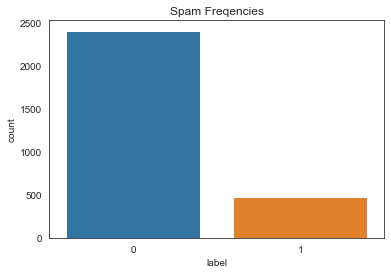

In [7]:
# Visualize spam  frequenices
#plt.figure(dpi=100)
sns.countplot(x=data['label'],data=data)
plt.title("Spam Freqencies")
plt.show()

In [8]:
# Separating the text as texts and label
X = pd.DataFrame(data['message'])
Y = pd.DataFrame(data['label'])


In [9]:
X.head()

,message
0,content - length : 3386 apple-iss research cen...
1,"lang classification grimes , joseph e . and ba..."
2,i am posting this inquiry for sergei atamas ( ...
3,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...


In [10]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [11]:
# name_of_raw_hams = [name for name in glob.glob(r'./data/raw/ham/*.txt')]
# name_of_raw_spams = [name for name in glob.glob(r'./data/raw/spam/*.txt')]
# list_of_csv_ham = []
# list_of_csv_spam = []

In [12]:
# # Combine ham emails to list_of_csv_ham
# for ham in name_of_raw_hams:
#     ham_content = pd.read_csv(ham , engine='python' , sep='delimiter', header=None ,encoding="latin_1")
#     list_of_csv_ham.append(ham_content)
#     # Combine spam emails to list_of_csv_spam
# for spam in name_of_raw_spams:
#     spam_content = pd.read_csv(spam, engine='python', sep='delimiter', header=None ,encoding="latin_1")
#     list_of_csv_spam.append(spam_content)
#     # Convert to data frames
# df_hams = pd.concat(list_of_csv_ham).reset_index(drop=True)
# df_spams = pd.concat(list_of_csv_spam).reset_index(drop=True)
# # Add the label column
# df_hams['y'] = [0] * len(df_hams)
# df_spams['y'] = [1] * len(df_spams)

In [13]:
# # Update column names
# col_name = {0: 'X', 'y': 'y'}
# df_hams = df_hams.rename(columns=col_name)
# df_spams = df_spams.rename(columns=col_name)

In [14]:
# # Concatenate to a full dataset
# df_emails = pd.concat([df_hams, df_spams], axis=0)

In [15]:
# # Save as csv files
# df_hams.to_csv('./data/ham_emails.csv', index=False)
# df_spams.to_csv('./data/spam_emails.csv', index=False)
# df_emails.to_csv('./data/emails.csv', index=False)

#### Data Cleaning

In [16]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')

In [17]:
X['label']=Y
X.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [18]:
df = X.copy()
df.head()


,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [19]:
# # Randomly shuffle rows to mix ham emails with spam ones
# df = df.sample(frac = 1).reset_index(drop=True)

In [20]:
display(df.shape)
display(df.head(10))
display(df.tail(10))

(2893, 2)

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0
5,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics at the uni...,0
7,call for papers linguistics session - - midwes...,0
8,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,0


,message,label
2883,"paper now available in post script . . . "" rap...",0
2884,hello thanks for stopping by ! ! we have taken...,1
2885,griffin bacal internet mail direct inquiries t...,0
2886,"dear sir or madam , this is not a "" spam "" mes...",1
2887,"raquel 's casino , inc . is awarding a cruise ...",1
2888,hello thanks for stopping by ! ! we have taken...,1
2889,"the list owner of : "" kiddin "" has invited you...",1
2890,"judging from the return post , i must have sou...",0
2891,gotcha ! there are two separate fallacies in t...,0
2892,hello ! i ' m working on a thesis concerning a...,0


In [21]:
# Create a stop list
self_define = ['enron','subject','ect','hou','e','http'] # Manual list of words to be removed
stoplist = stopwords.words('english') + list(string.punctuation) + self_define
stoplist = set(stoplist)

In [22]:
def trim_word(text):
    '''Remove unrelated words or symbols in emails
    Param: text: email content as a string
    '''
    text = [word for word in word_tokenize(text) if word.lower() not in stoplist and not word.isdigit() and word.isalpha()]
    return " ".join(text)

In [23]:
df['message'] = df['message'].astype(str)

In [24]:
# # Remove punctuation, stop words, and self-defined words in X
df['message'] = df['message'].apply(trim_word)

In [25]:
df2 = df.copy()

In [26]:
# Check missing values
nan_value = float('NaN')
df2.replace('', nan_value, inplace=True)
n_missing_values = df2.isnull().sum()[0]
print('Total missing values (NaN) in the feature column:', n_missing_values)
print('\nTotal missing values (NaN) takes up {:.2%} of our data.'.format(n_missing_values/len(df.index)))

Total missing values (NaN) in the feature column: 1

Total missing values (NaN) takes up 0.03% of our data.


In [27]:
# # Remove rows containing missing values
df2.dropna(subset=['message'], inplace=True)

In [28]:
df2 = df2.sort_values(by='message')

In [29]:
# Drop rows that contain non-english characters
df2.drop(df2.tail(93).index, inplace=True)

In [30]:
display(df2.shape)
display(df2.head(10))
display(df2.tail(10))

(2799, 2)

,message,label
1713,aaal graduate student travel grant purpose hel...,0
159,abc super associated benefit consultants dear ...,1
1174,absolutely last call papers sixth workshop lar...,0
2323,abstracts due february workshop current topics...,0
2226,accept editors recent challenge resuming last ...,0
1894,acl association computational linguistics call...,0
1186,acl association computational linguistics conf...,0
1748,acl call papers annual meeting association com...,0
2530,acl call papers annual meeting association com...,0
878,acl sigdat presents third workshop large corpo...,0


,message,label
1843,working construction cape town dialect involve...,0
2232,working history relative markers spoken langua...,0
520,working light verb constructions farsi kurdish...,0
1740,working paper vennemann theory natural seriali...,0
1936,working project need explore relationship rock...,0
2331,workshop advances analogy research integration...,0
716,workshop american indigenous languages santa b...,0
1921,workshop announcement call abstracts third utr...,0
1396,workshop announcement call papers c l c februa...,0
2569,workshop announcement call papers linguistic c...,0


In [31]:
# Save as cleand df
# df2.to_csv('./data/emails_cleaned.csv', index=False)

In [32]:
df2.shape
print('The model-ready dataset contains {} rows.'.format(df2.shape[0]))

The model-ready dataset contains 2799 rows.


### Exploratory Data Analysis


In [33]:
import pandas as pd
import numpy as np
import itertools
import collections
import matplotlib
import nltk
from wordcloud import WordCloud
nltk.download('averaged_perceptron_tagger')
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
# df_emails = pd.read_csv('./data/emails.csv')
# df = pd.read_csv('./data/emails_cleaned.csv')

#### Text Statistics Analysis




In [35]:
email_length_counts = df2.message.str.len()
mean_email_length = email_length_counts.mean()
std_email_length = email_length_counts.std()
email_length_counts.describe()

count     2799.000000
mean      2050.602001
std       2256.658108
min         14.000000
25%        588.000000
50%       1315.000000
75%       2617.000000
max      18207.000000
Name: message, dtype: float64

#### Word Length Visualization

C:\Users\admin\AppData\Local\Temp\ipykernel_20952\4152991561.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


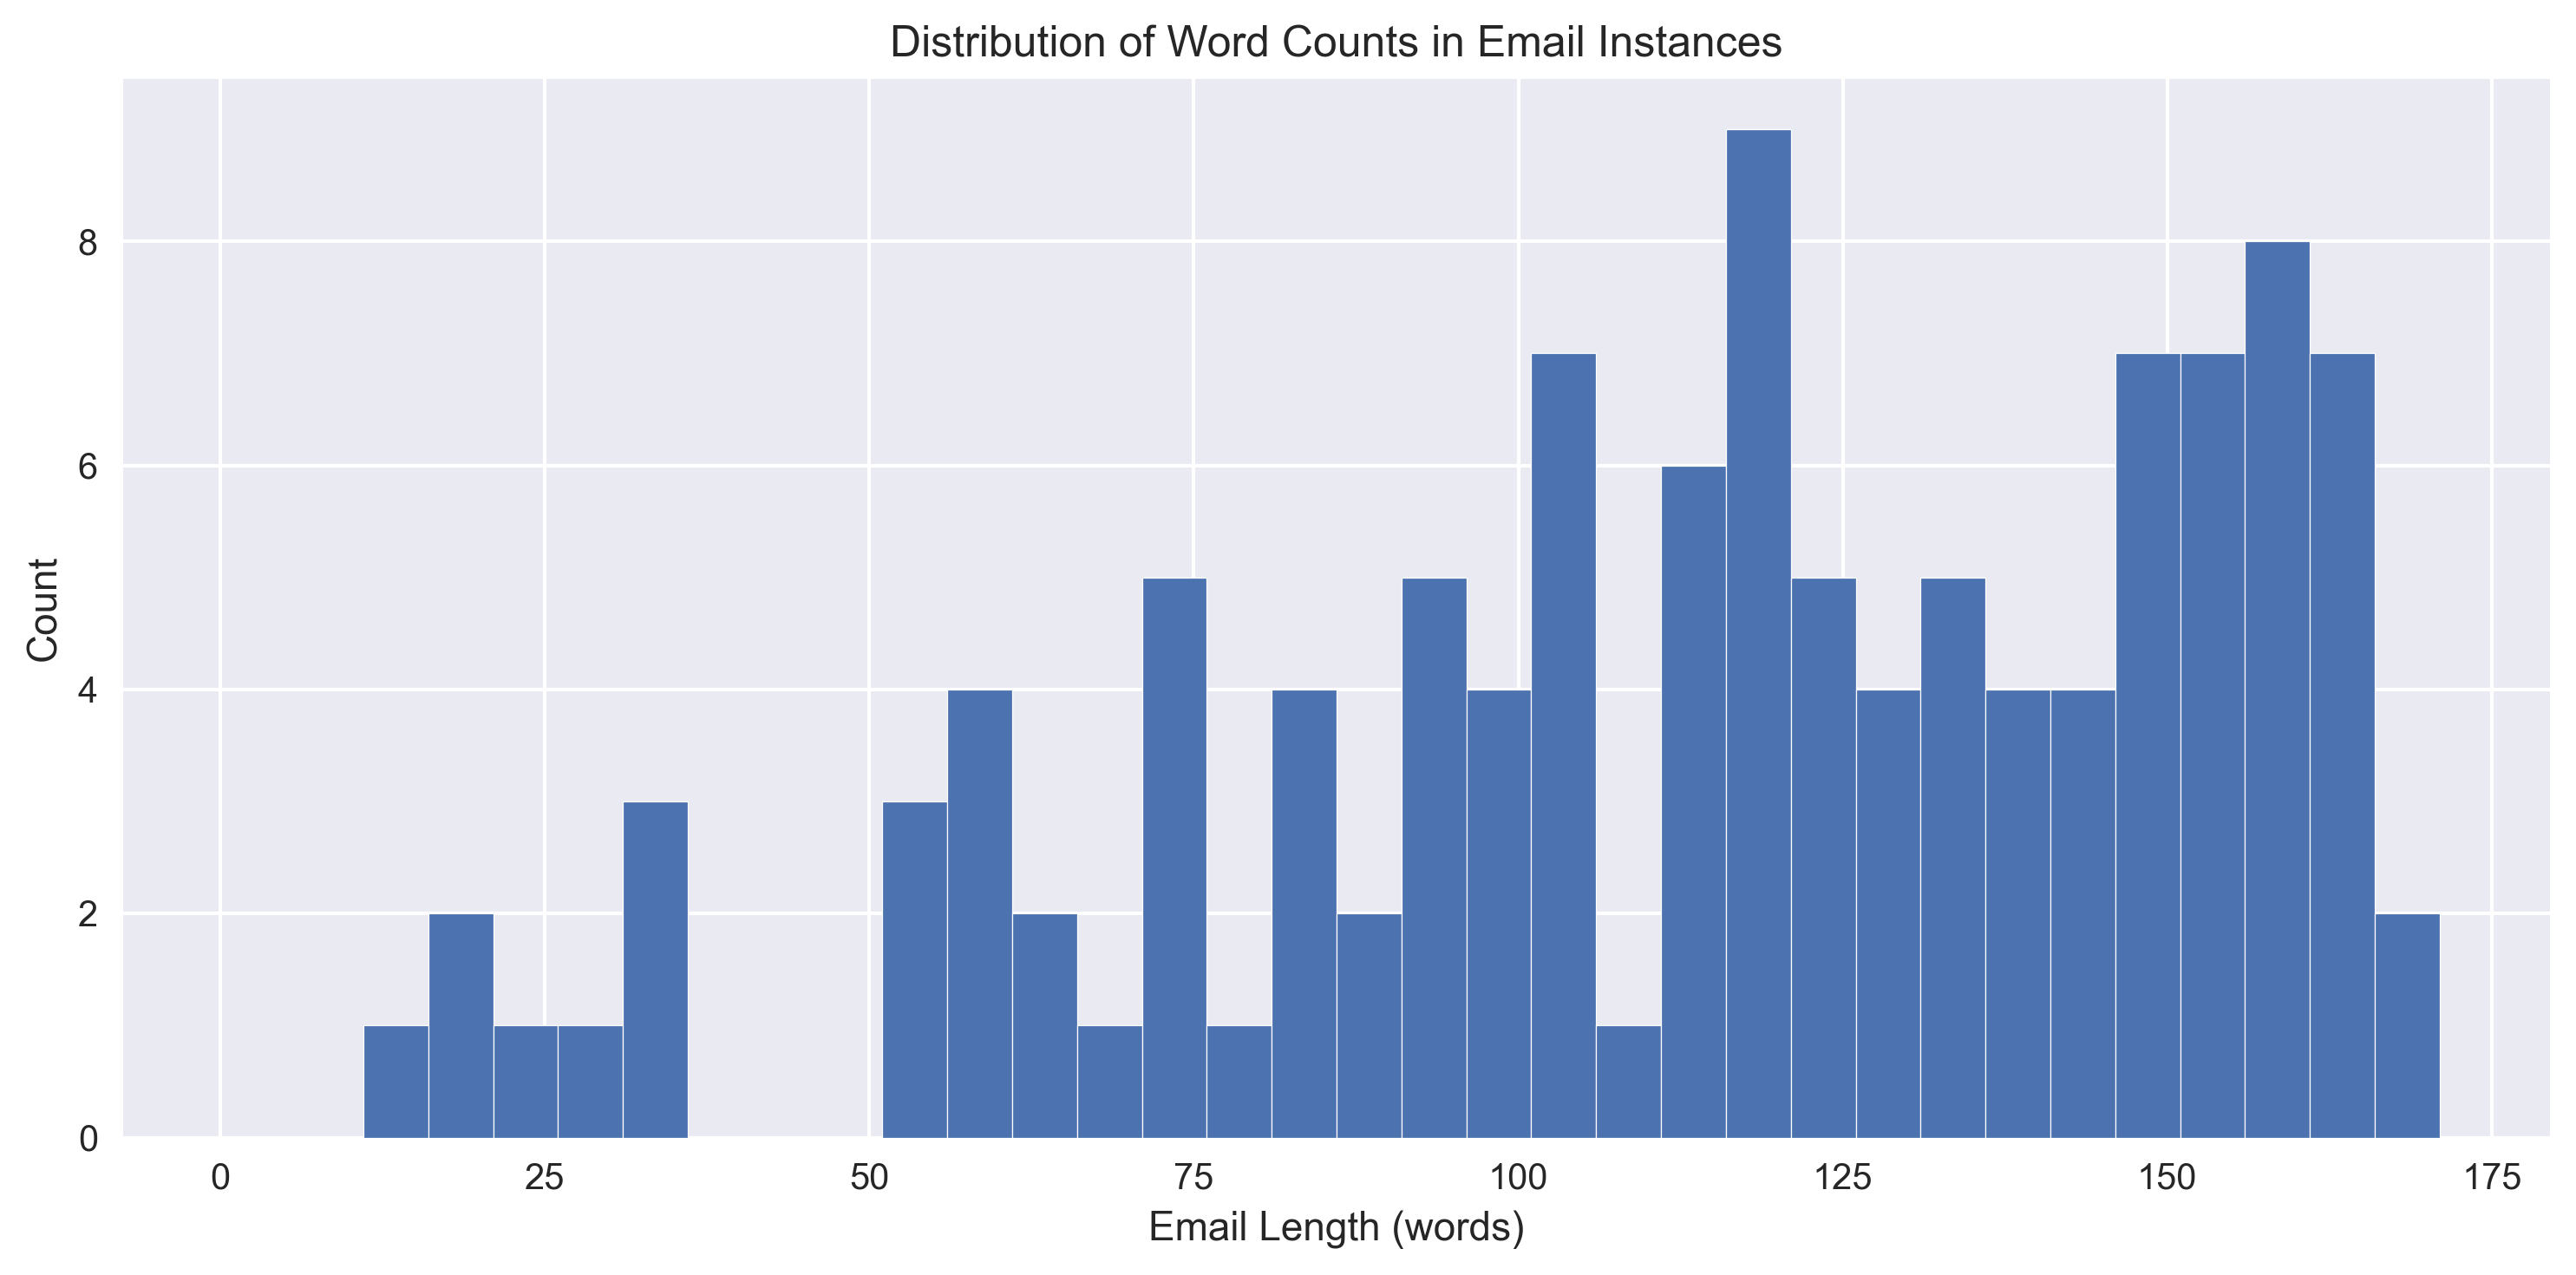

In [36]:
range_min = 1
range_max = 60 + 113

# Plot the average word length in each email instance
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(10, 5), dpi=300, tight_layout=True)
plt.hist(email_length_counts, bins=range(range_min, range_max, 5))
plt.xlabel('Email Length (words)')
plt.ylabel('Count')
plt.title('Distribution of Word Counts in Email Instances')
plt.show()
# fig.savefig('./results/distribution_of_word_counts.png', dpi=fig.dpi)


#### Missing Values


The cleaned dateset was verified for missing values in the data processing stage. As a consequence, 43,469 (5.24%) of the rows had missing values. Because it was a minor percentage, all rows with missing data were removed.

#### Dimensions on the dataset


There are 2 columns and 785,648 rows in the cleaned email dataset.

In [37]:
df.shape

(2893, 2)

In [38]:
display(df.head())
display(df.tail())

,message,label
0,content length research center us million join...,0
1,lang classification grimes joseph barbara f gr...,0
2,posting inquiry sergei atamas satamas umabnet ...,0
3,colleague researching differing degrees risk p...,0
4,earlier morning phone friend mine living south...,0


,message,label
2888,hello thanks stopping taken many new pics made...,1
2889,list owner kiddin invited join mailing list li...,1
2890,judging return post must sounded like kind exp...,0
2891,gotcha two separate fallacies argument compari...,0
2892,hello working thesis concerning attitudes towa...,0


#### Word Frequencies




The frequency of each term in the dataset was sorted in descending order in this section. The top 15 most commonly used terms are summarised in the table below.

In [39]:
df['message'] = df['message'].astype(str)
token = [word.lower().split() for word in df['message']]
token_extract = list(itertools.chain(*token))
token_count = collections.Counter(token_extract)

In [40]:
clean_token = pd.DataFrame(token_count.most_common(15), columns=['words', 'count'])

In [41]:
# clean_token.to_csv('./results/top_15_most_frequently_used_words.csv', index=False)

In [42]:
display(clean_token)

,words,count
0,university,6315
1,language,6132
2,linguistics,3150
3,information,3147
4,one,2838
5,de,2831
6,conference,2552
7,papers,2493
8,languages,2325
9,please,2250



**Top 15 most frequently used words in the emails**

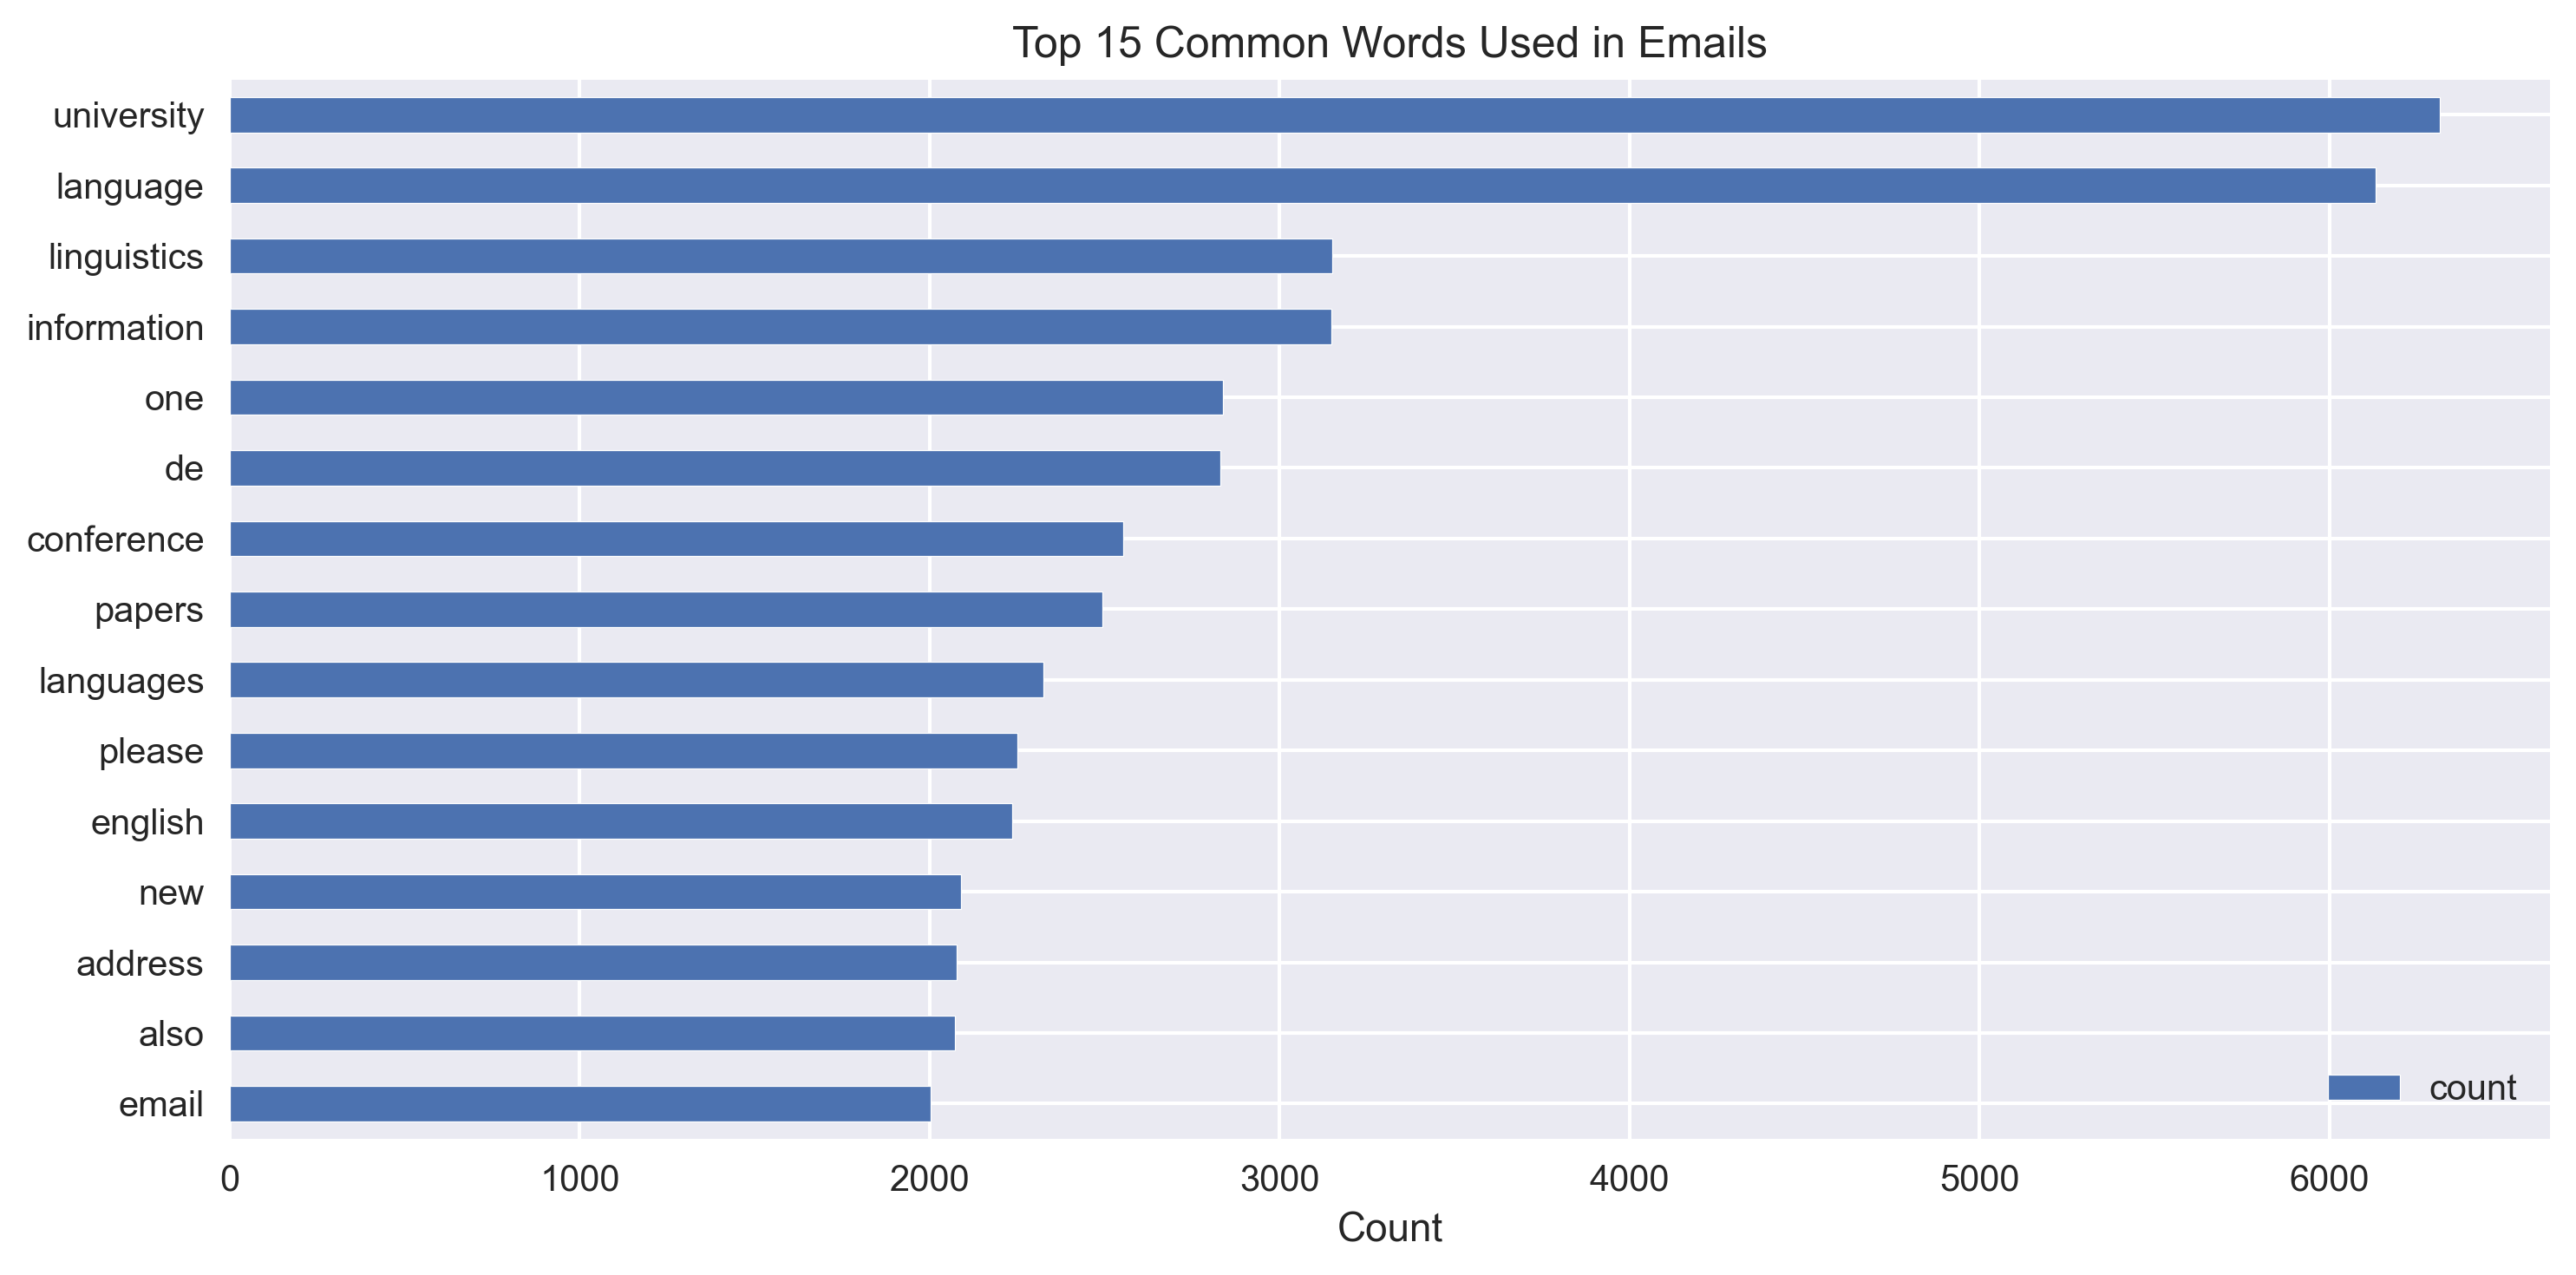

In [43]:
# Visualize top 15 most frequently used words
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_token.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Words Used in Emails")
plt.show()
# fig.savefig('./results/top_15_common_words_used_in_emails.png', dpi=fig.dpi)

**Top 15 most frequently used adjectives and adverbs in emails**

In [44]:
pos_tags = nltk.pos_tag(token_extract)

adj = []
adv = []
noun = []

for word, pos in pos_tags:
    if (pos in "JJ"):
        adj.append(word)
    if (pos in "WRB"):
        adv.append(word)
    if (pos in "NN"):
        adv.append(word)

adj_count = collections.Counter(adj)
clean_adj = pd.DataFrame(adj_count.most_common(15), columns=['words', 'count'])

adv_count = collections.Counter(adv)
clean_adv = pd.DataFrame(adv_count.most_common(15), columns=['words', 'count'])

noun_count = collections.Counter(noun)
clean_noun = pd.DataFrame(adv_count.most_common(15), columns=['words', 'count'])

In [45]:
display(clean_adj)
display(clean_adv)
display(clean_noun)

,words,count
0,new,2090
1,english,2064
2,linguistic,1422
3,uk,1213
4,available,1141
5,free,1095
6,many,1084
7,international,973
8,u,969
9,usa,947


,words,count
0,language,6132
1,university,6102
2,information,3147
3,conference,2552
4,also,2072
5,research,1788
6,order,1633
7,program,1592
8,mail,1513
9,fax,1434


,words,count
0,language,6132
1,university,6102
2,information,3147
3,conference,2552
4,also,2072
5,research,1788
6,order,1633
7,program,1592
8,mail,1513
9,fax,1434


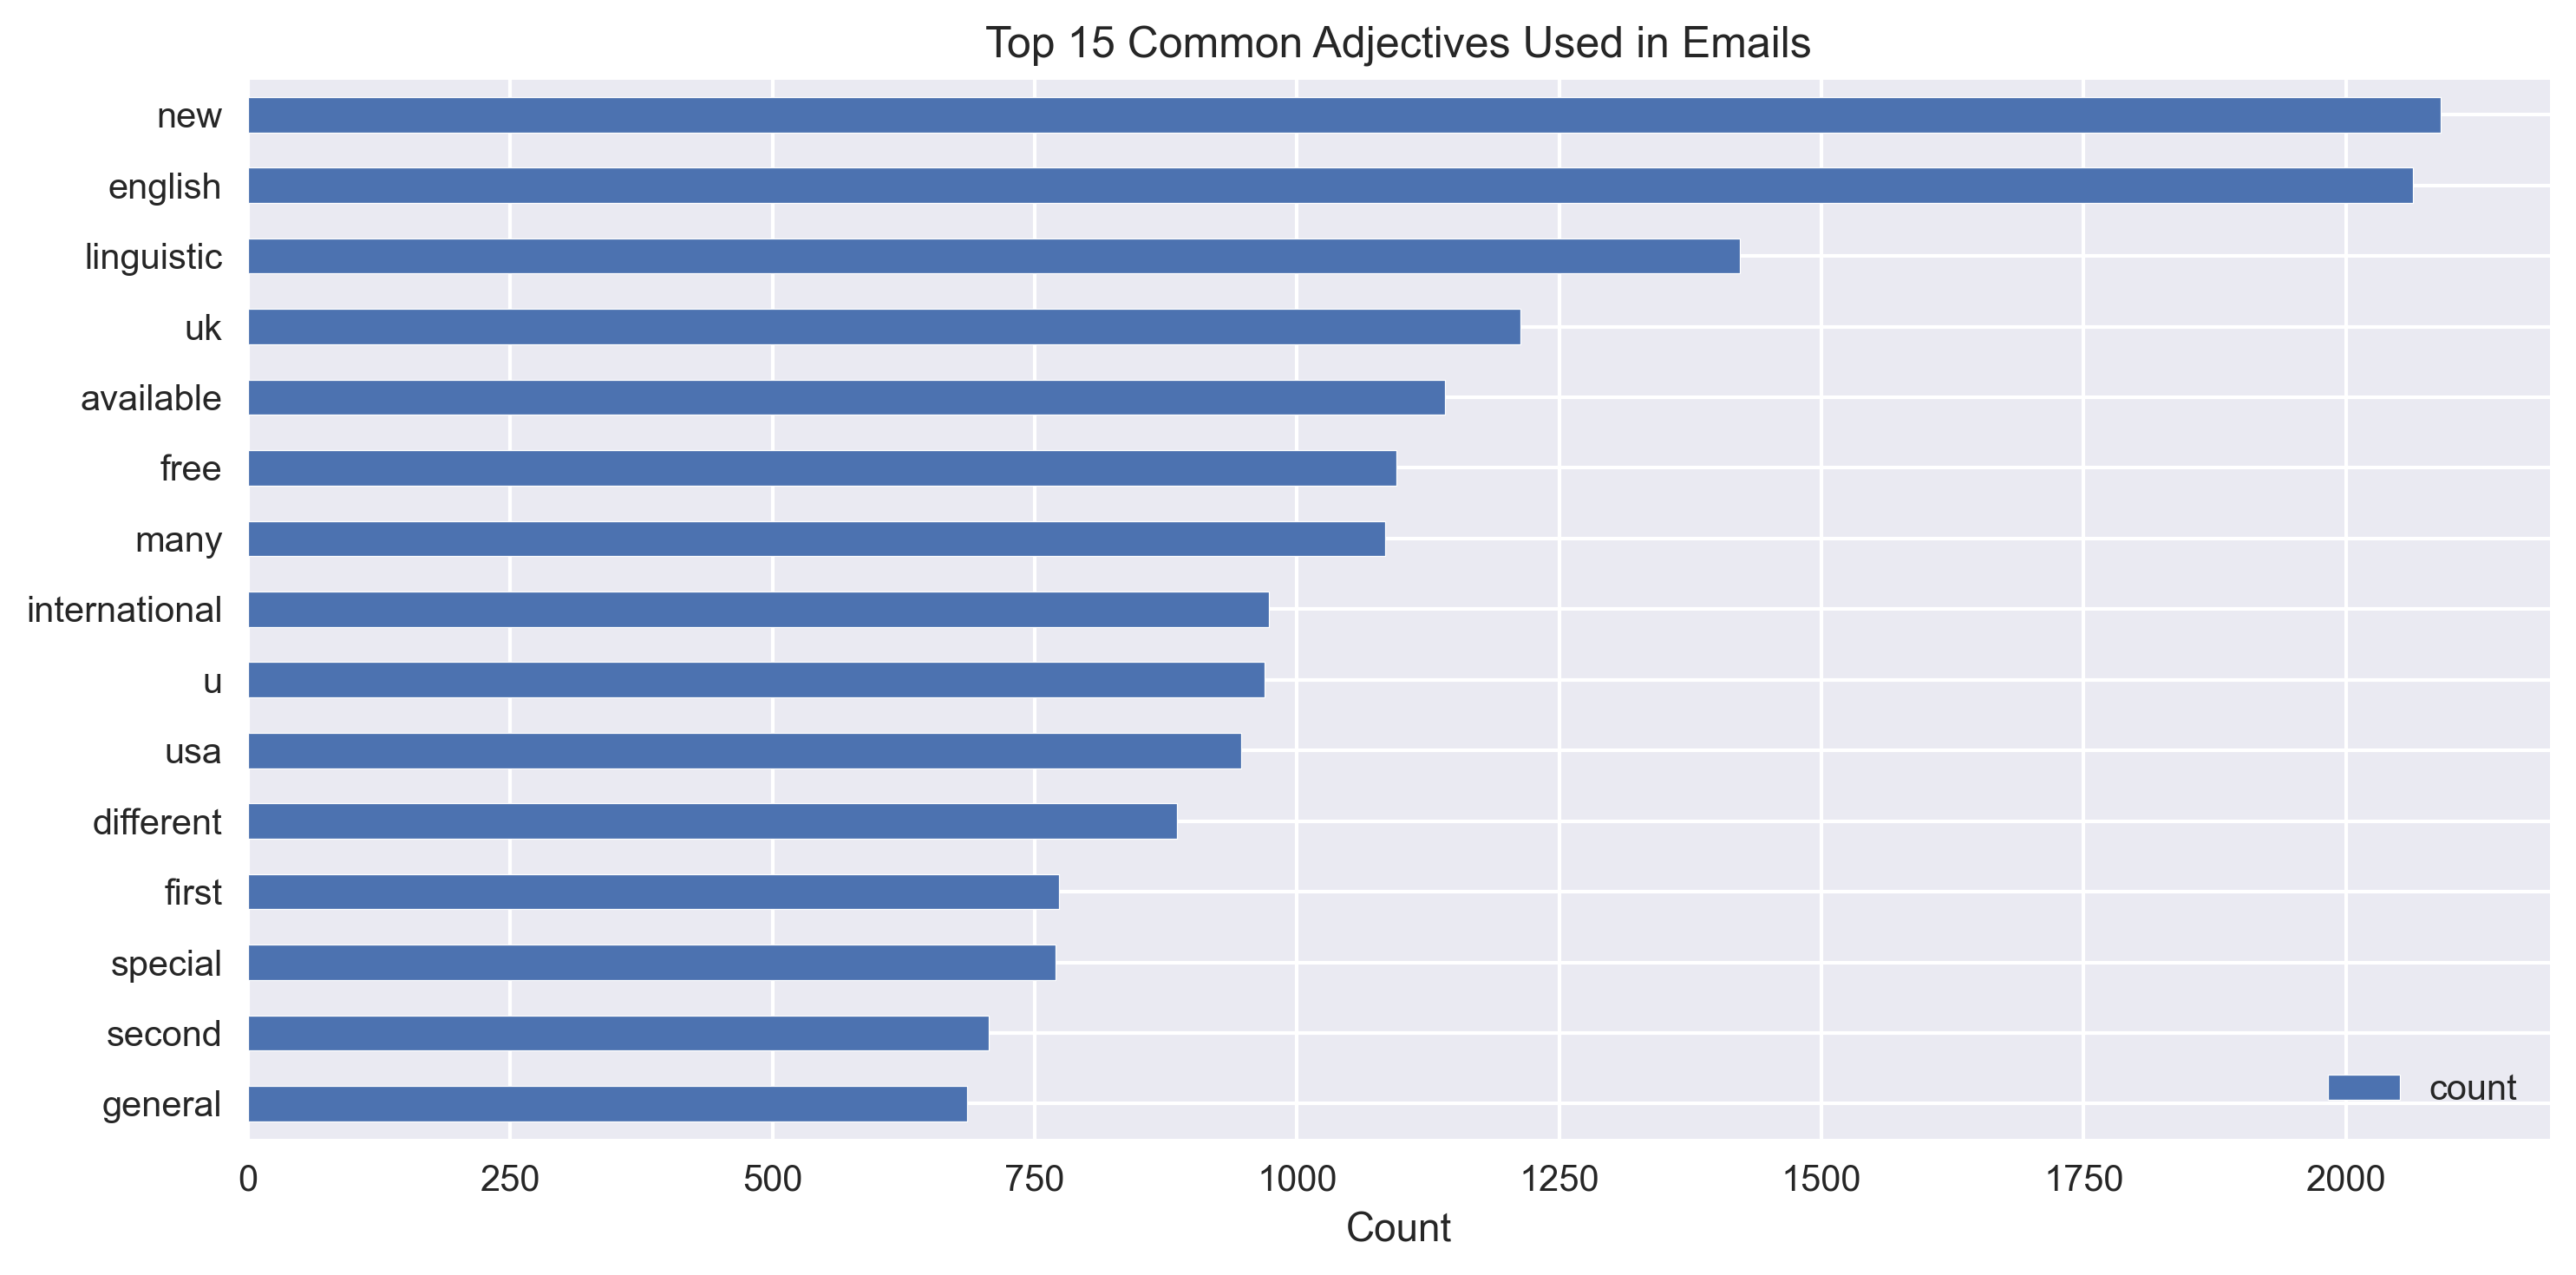

In [46]:
# Visualize top 15 most frequently used adjectives
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_adj.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adjectives Used in Emails")
plt.show()
# fig.savefig('./results/top_15_common_adjectives_used_in_emails.png', dpi=fig.dpi)

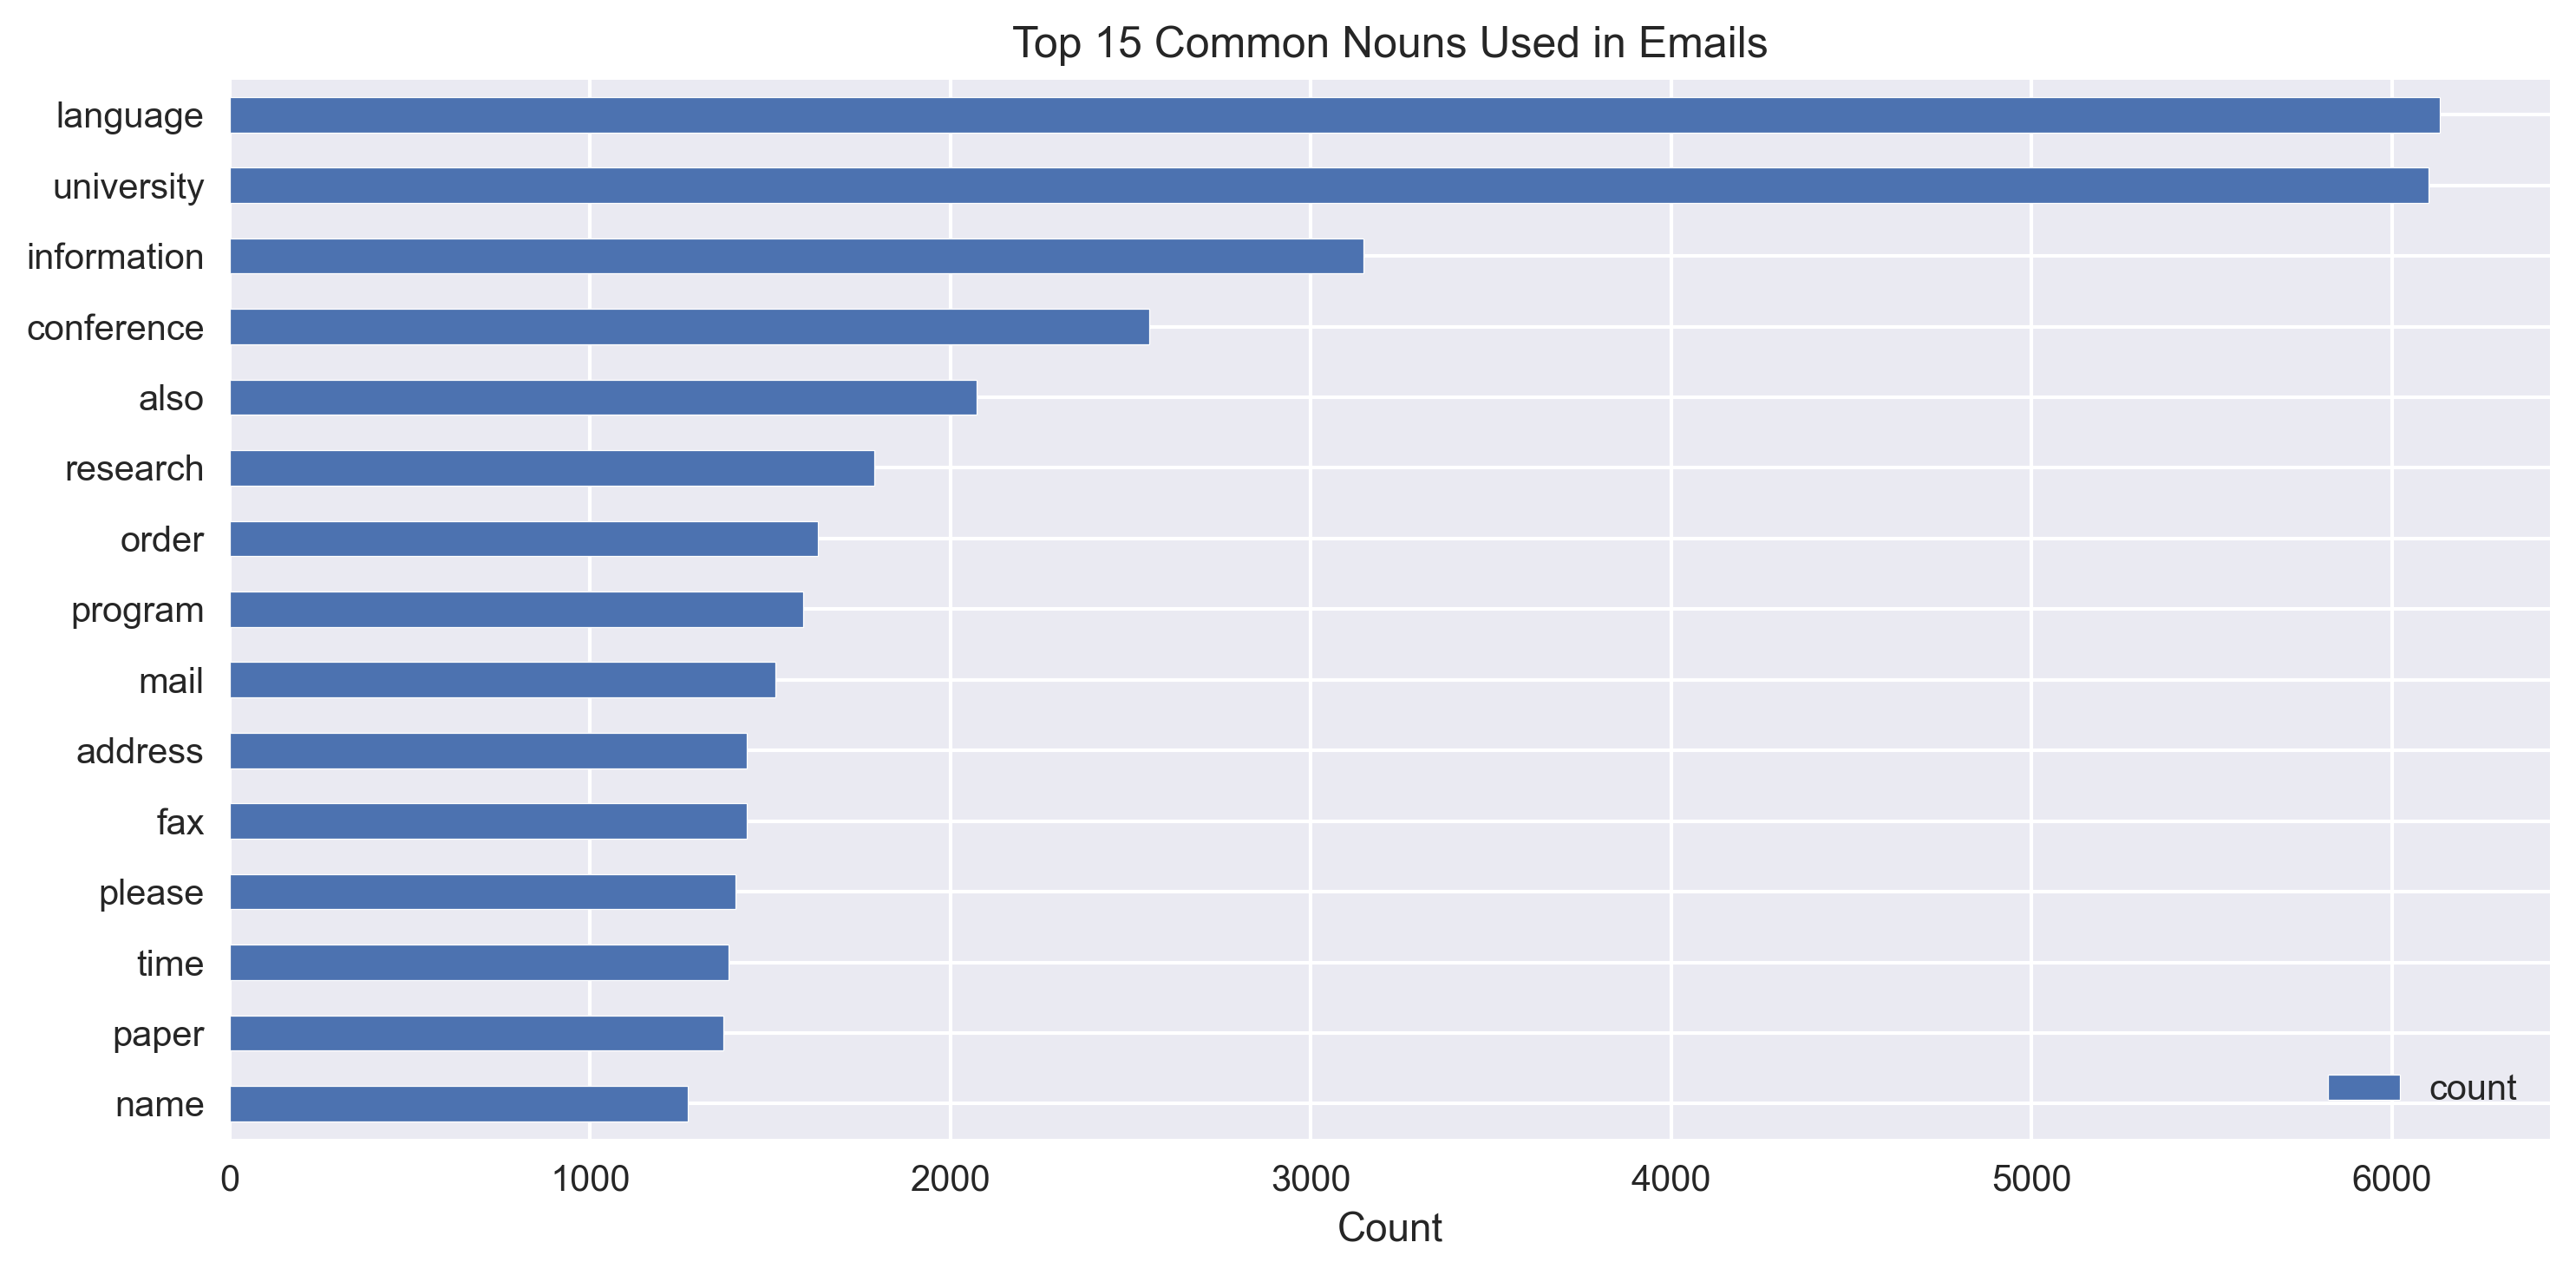

In [47]:
# Visualize top 15 most frequently used nouns
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_noun.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Nouns Used in Emails")
plt.show()
# fig.savefig('./results/top_15_common_nouns_used_in_emails.png', dpi=fig.dpi)

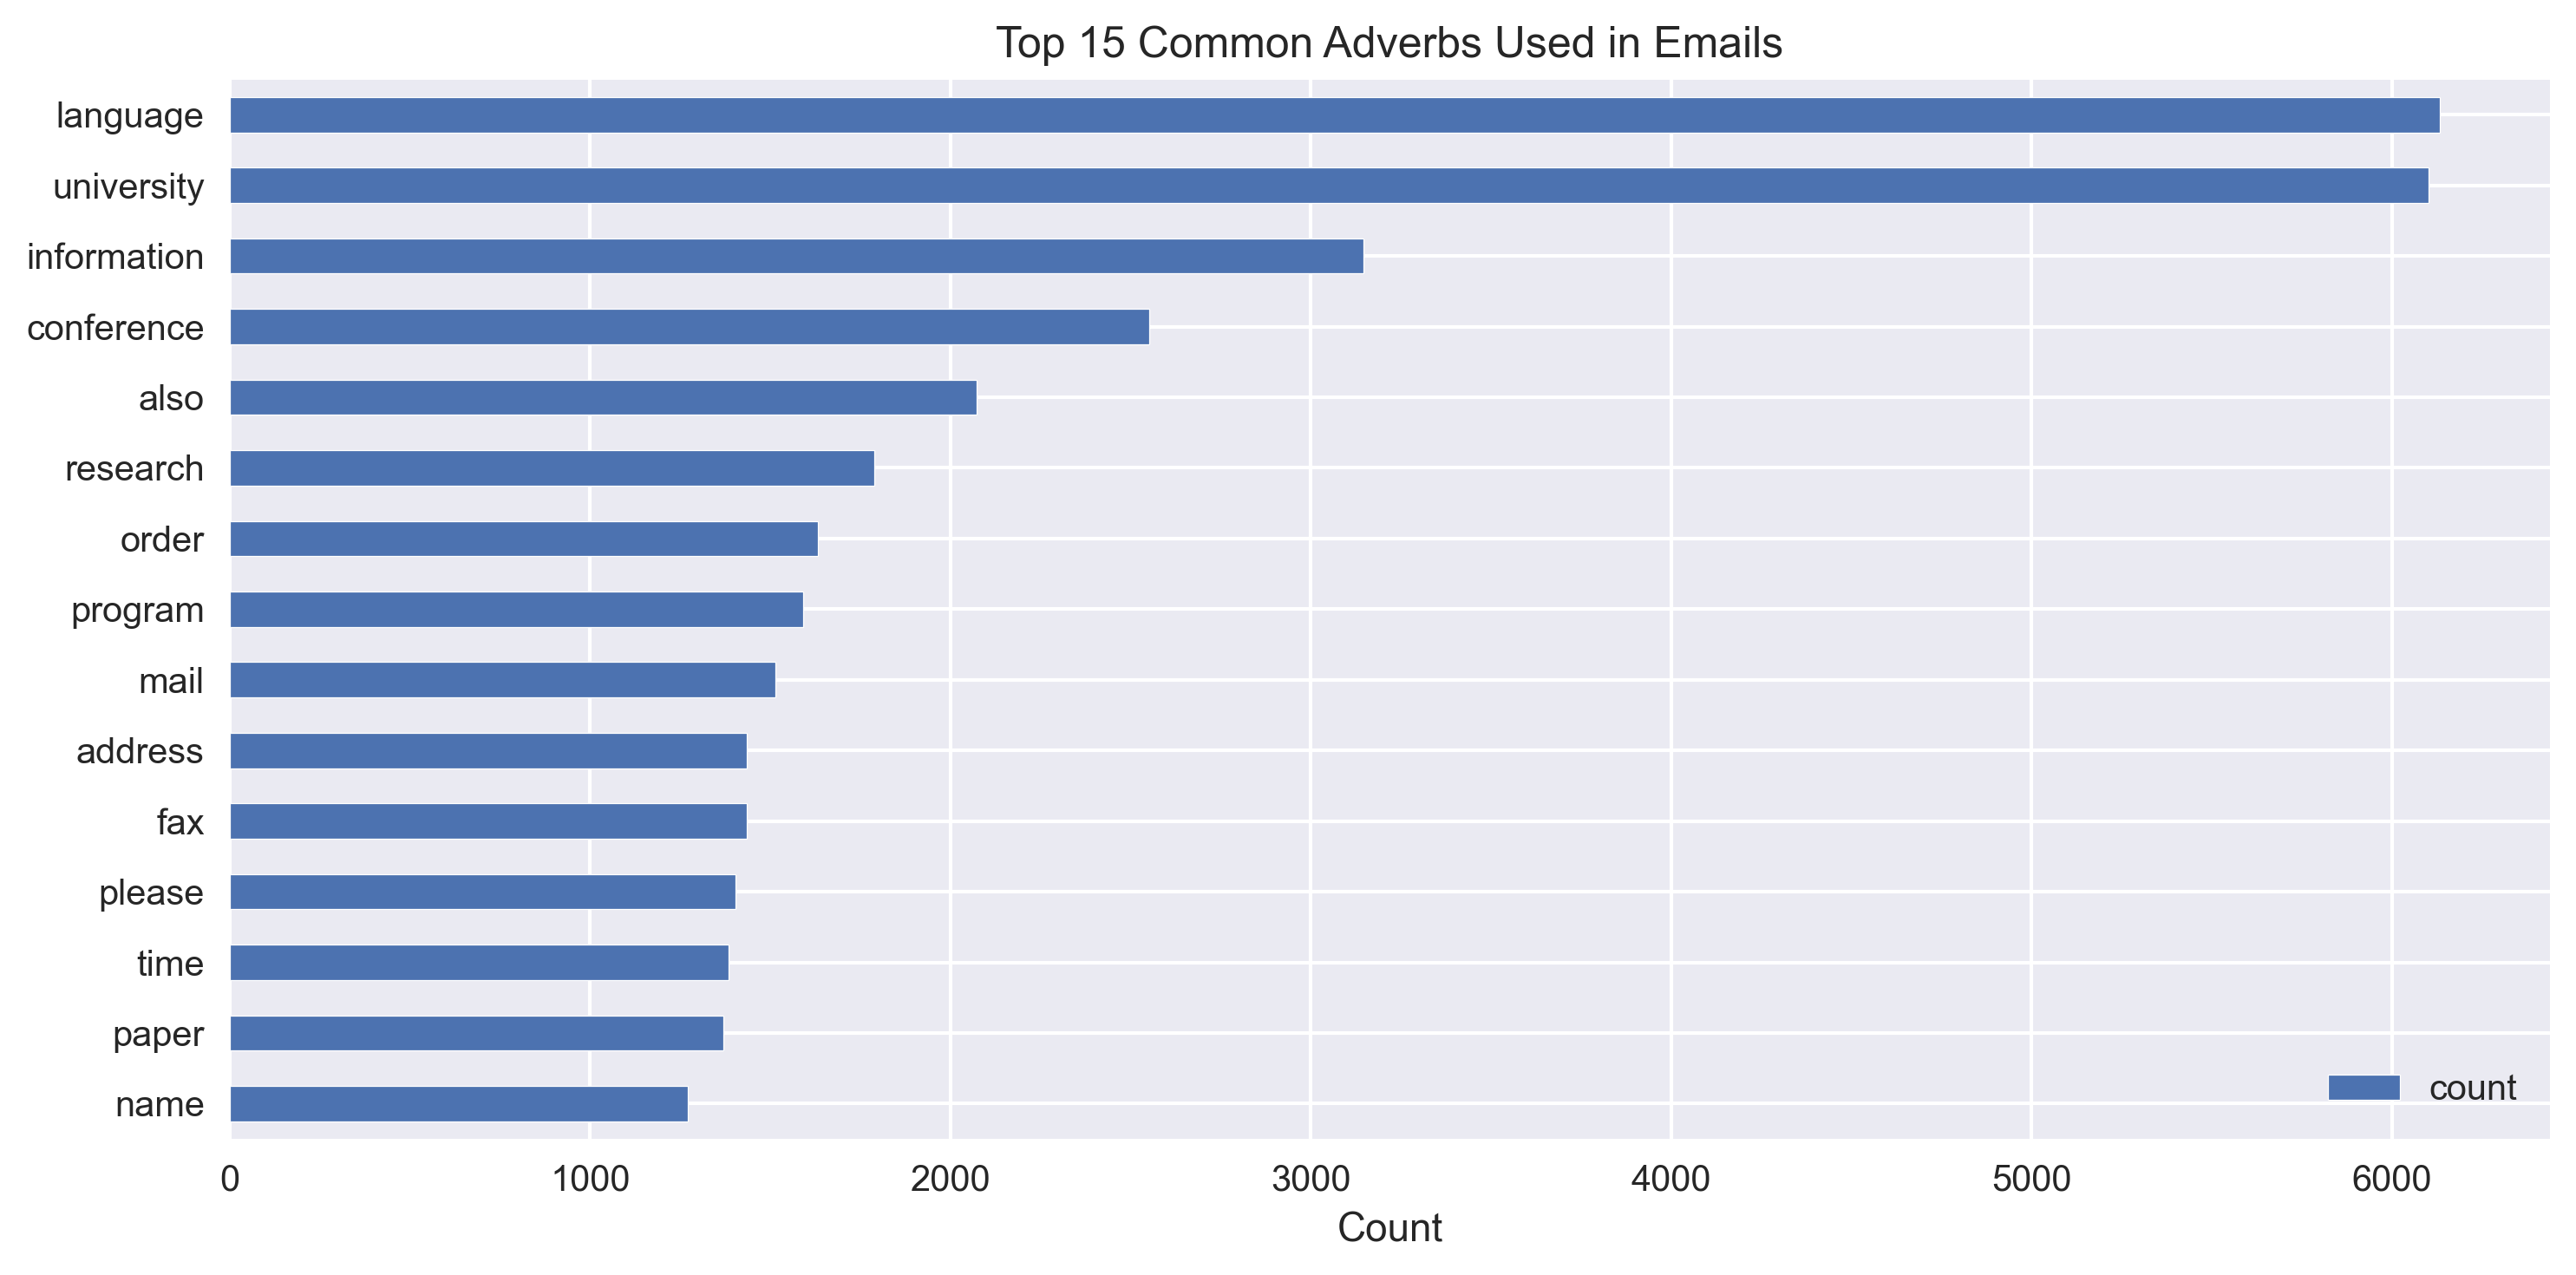

In [48]:
# Visualize top 15 most frequently used adverbs
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, tight_layout=True)
clean_adv.sort_values(by='count').plot.barh(x='words', y='count', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title("Top 15 Common Adverbs Used in Emails")
plt.show()
# fig.savefig('./results/top_15_common_adverbs_used_in_emails.png', dpi=fig.dpi)

**Word Clouds**

In [49]:
str_token = ' '.join(map(str, token_extract)) # Convert list token to string
wordcloud_type1 = WordCloud().generate(str_token)

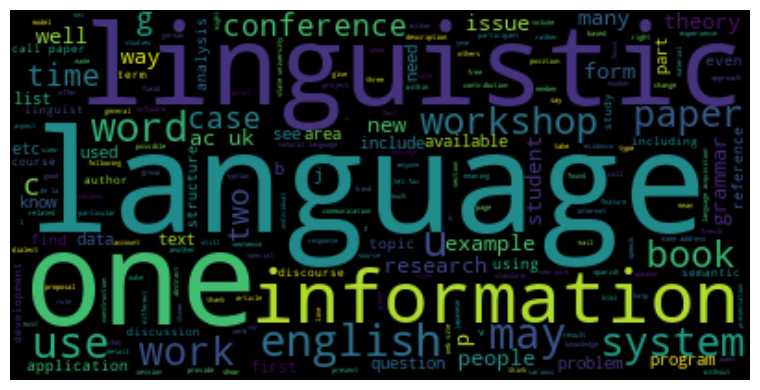

In [50]:
fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)
plt.imshow(wordcloud_type1, interpolation='bilinear')
plt.axis("off")
plt.show()
# fig.savefig('./results/word_cloud_type1.png', dpi=fig.dpi)

In [51]:
wordcloud_type2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_token)

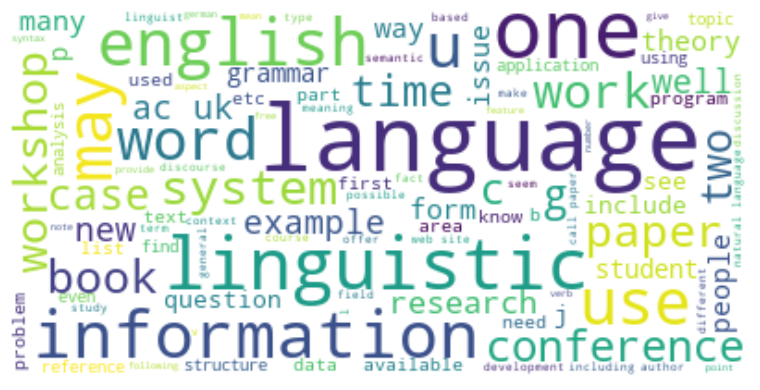

In [52]:
# Change background color and plot a new word cloud graph
fig = plt.figure(figsize=(8, 4), dpi=100, tight_layout=True)
plt.imshow(wordcloud_type2, interpolation="bilinear")
plt.axis("off")
plt.show()
# fig.savefig('./results/word_cloud_type2.png', dpi=fig.dpi)

**Spam Ratio** <br>
The dataset contains 378,601 spam records (48.18%). There are 407,140 emails which are not spam (51.81%).

In [53]:
display(df['label'].value_counts())
display((df['label'].value_counts() / len(df['label'])) * 100)

0    2412
1     481
Name: label, dtype: int64

0    83.373661
1    16.626339
Name: label, dtype: float64

In [54]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])

In [55]:
display(X.shape)

(2893, 53219)

In [56]:
# Mapping from feature integer indices to feature name and display the first 15 results.
sample_feature_dict = dict(itertools.islice(vectorizer.vocabulary_.items(), 15))
display(sample_feature_dict)

{'content': 9689,
 'length': 27235,
 'research': 40003,
 'center': 7420,
 'us': 49887,
 'million': 30597,
 'joint': 24603,
 'venture': 50414,
 'apple': 2498,
 'computer': 9178,
 'inc': 22498,
 'institute': 23162,
 'systems': 46323,
 'science': 42134,
 'national': 32185}

In [57]:
df_sample_features = pd.DataFrame.from_dict(sample_feature_dict, orient='index')

In [58]:
# df_sample_features.to_csv('./results/sample_features.csv', index=False)

### Model Development 



A tiny subset of the original dataset was created using Random sampling. In addition, feature engineering is used to train the model.

Models will be trained using the sampled data. The remaining data will be used as a reserve. After the model has been trained, it is applied to hold-out data to evaluate model performance.

### Architecture Diagram for Email Spam Classification

In [59]:
from IPython.display import Image
# Image(filename='./results/Architechture Diagram.png')

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
# df_origin = pd.read_csv('./data/emails_cleaned.csv')
df_origin = df2

In [62]:
# Remove rows containing missing values
df_origin.dropna(subset=['message'], inplace=True)
# Confirm that there is no missing values
df_origin.isnull().sum()

message    0
label      0
dtype: int64

In [63]:
df = df_origin.sample(frac=0.05, replace=False, random_state=88)

In [64]:
print('The model-ready dataset contains {} rows.'.format(df.shape[0]))

The model-ready dataset contains 140 rows.


### Feature Engineering


The term frequency-inverse document frequency (TF-IDF) approach is used to convert string email contents into meaningful numeric numbers for model training.

In [65]:
# Create a vectorization matrix using tf-idf vectorizer
vectorizer = TfidfVectorizer()
vectorized_emails = vectorizer.fit_transform(df.message)
vectorized_emails

<140x9357 sparse matrix of type '<class 'numpy.float64'>'
	with 21876 stored elements in Compressed Sparse Row format>

### Methods



**Train Test Split** <br>
The data set is divided into two parts before fitting the model: train set and test set. The training set is used to train models, while the test set is used to evaluate each model's performance.<br><br><br>
**Cross Validation**<br>
 5-fold cross validation is applied to improve model performance <br><br>
**Grid and Randomized Search**
The hyperparameters were tuned using grid search and randomised search. The goal is to find the best hyperparameter so that the model can reach its maximum complexity.

In [66]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(vectorized_emails, df.label, test_size=test_size, random_state=88)

### Random Forest (Baseline)

The hyperparameters of the random forest were fine-tuned using randomized search. As a result, n_estimators were set as 500, max_depth as 200 and min_samples_leaf as 10.

In [67]:
# Setup a hyperparameter grid for random forest
n_estimators = [50, 100, 200, 500]
max_depth = [10, 50, 100, 200]
min_samples_leaf = [10, 20, 50, 100]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth ,'min_samples_leaf': min_samples_leaf}

In [68]:
rf = RandomForestClassifier(criterion='entropy', random_state=88, verbose=0.5)

In [69]:
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, n_iter= 10, scoring='roc_auc')

In [70]:
rf_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=88,
                                                    verbose=0.5),
                   param_distributions={'max_depth': [10, 50, 100, 200],
                                        'min_samples_leaf': [10, 20, 50, 100],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='roc_auc')

In [71]:
best_param_rf = rf_cv.best_params_
validation_auc_rf = rf_cv.best_score_

# Predict on the test data
y_pred_prob = rf_cv.predict_proba(X_test)[:, 1]
test_auc_rf = roc_auc_score(y_test, y_pred_prob)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [72]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=10,
                       n_estimators=500, random_state=88, verbose=0.5)

In [73]:
print('Tuned Random Forest Parameters: {}'.format(best_param_rf))
print('Tuned Random Forest Validation AUC: {}'.format(validation_auc_rf))
print('Tuned Random Forest Test AUC: {}'.format(test_auc_rf))

Tuned Random Forest Parameters: {'n_estimators': 500, 'min_samples_leaf': 10, 'max_depth': 50}
Tuned Random Forest Validation AUC: 0.9754385964912281
Tuned Random Forest Test AUC: 0.9615384615384616


C:\Users\admin\AppData\Local\Temp\ipykernel_20952\2668530500.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


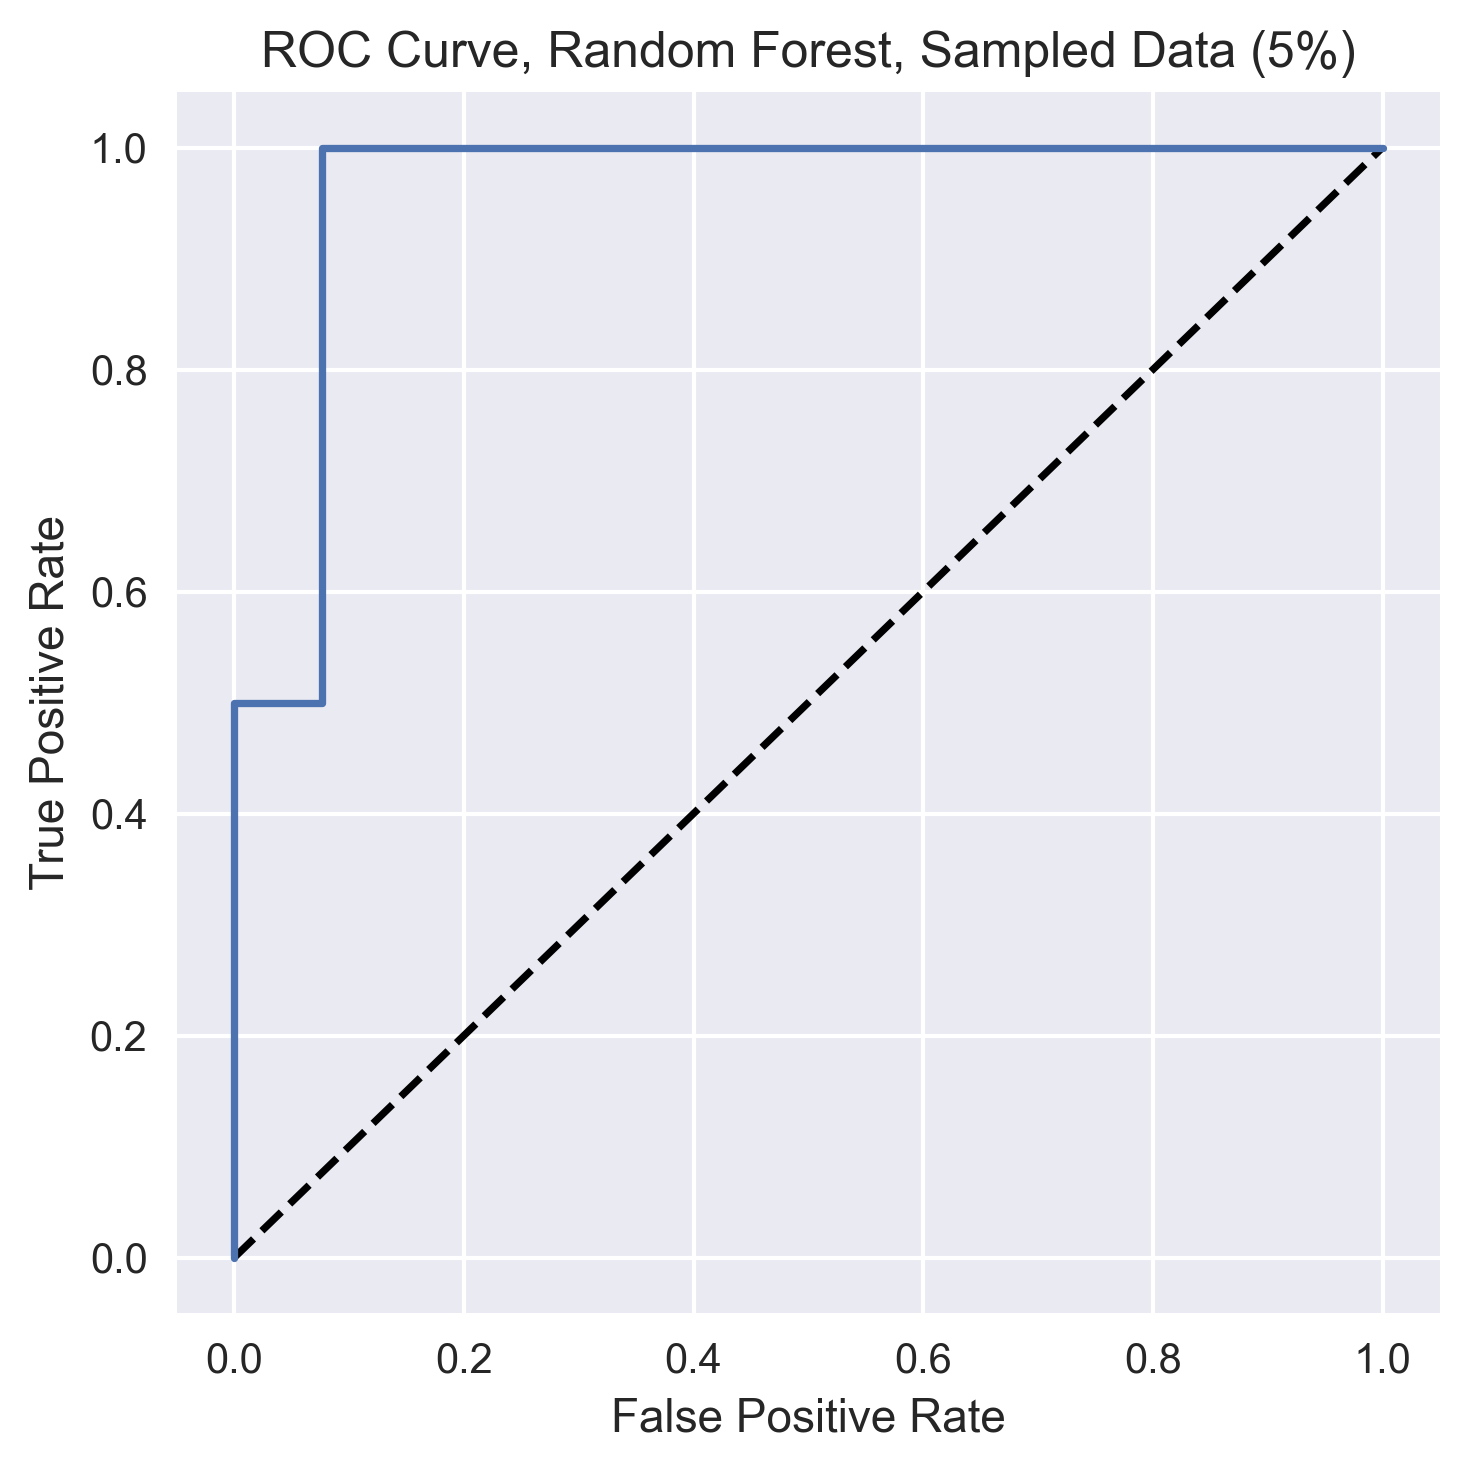

In [74]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Random Forest, Sampled Data (5%)')
plt.show()
# fig.savefig('./results/roc_curve_random_forest_sample.png', dpi=fig.dpi)

### Support Vector Machine

In [75]:
# Create an instance of the SVM classifier
svm = SVC(probability=True)

In [76]:
# Setup a hyperparameter grid for SVM
C = [0.1, 1]
kernel = ['linear']
degree = [2, 3]
gamma = [0.1, 1]
param_grid = {'C': C,'kernel': kernel,}


In [77]:
svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1], 'kernel': ['linear']},
             scoring='roc_auc')

In [78]:
best_param_svm = svm_cv.best_params_
validation_auc_svm = svm_cv.best_score_

# Predict on the test data
y_pred_prob = svm_cv.predict_proba(X_test)[:, 1]
test_auc_svm = roc_auc_score(y_test, y_pred_prob)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob)

In [79]:
svm_cv.best_estimator_

SVC(C=0.1, kernel='linear', probability=True)

In [80]:
print('Tuned SVM Bayes Parameters: {}'.format(best_param_svm))
print('Tuned SVM Validation AUC: {}'.format(validation_auc_svm))
print('Tuned SVM Test AUC: {}'.format(test_auc_svm))

Tuned SVM Bayes Parameters: {'C': 0.1, 'kernel': 'linear'}
Tuned SVM Validation AUC: 0.9973684210526315
Tuned SVM Test AUC: 1.0


C:\Users\admin\AppData\Local\Temp\ipykernel_20952\3098113349.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


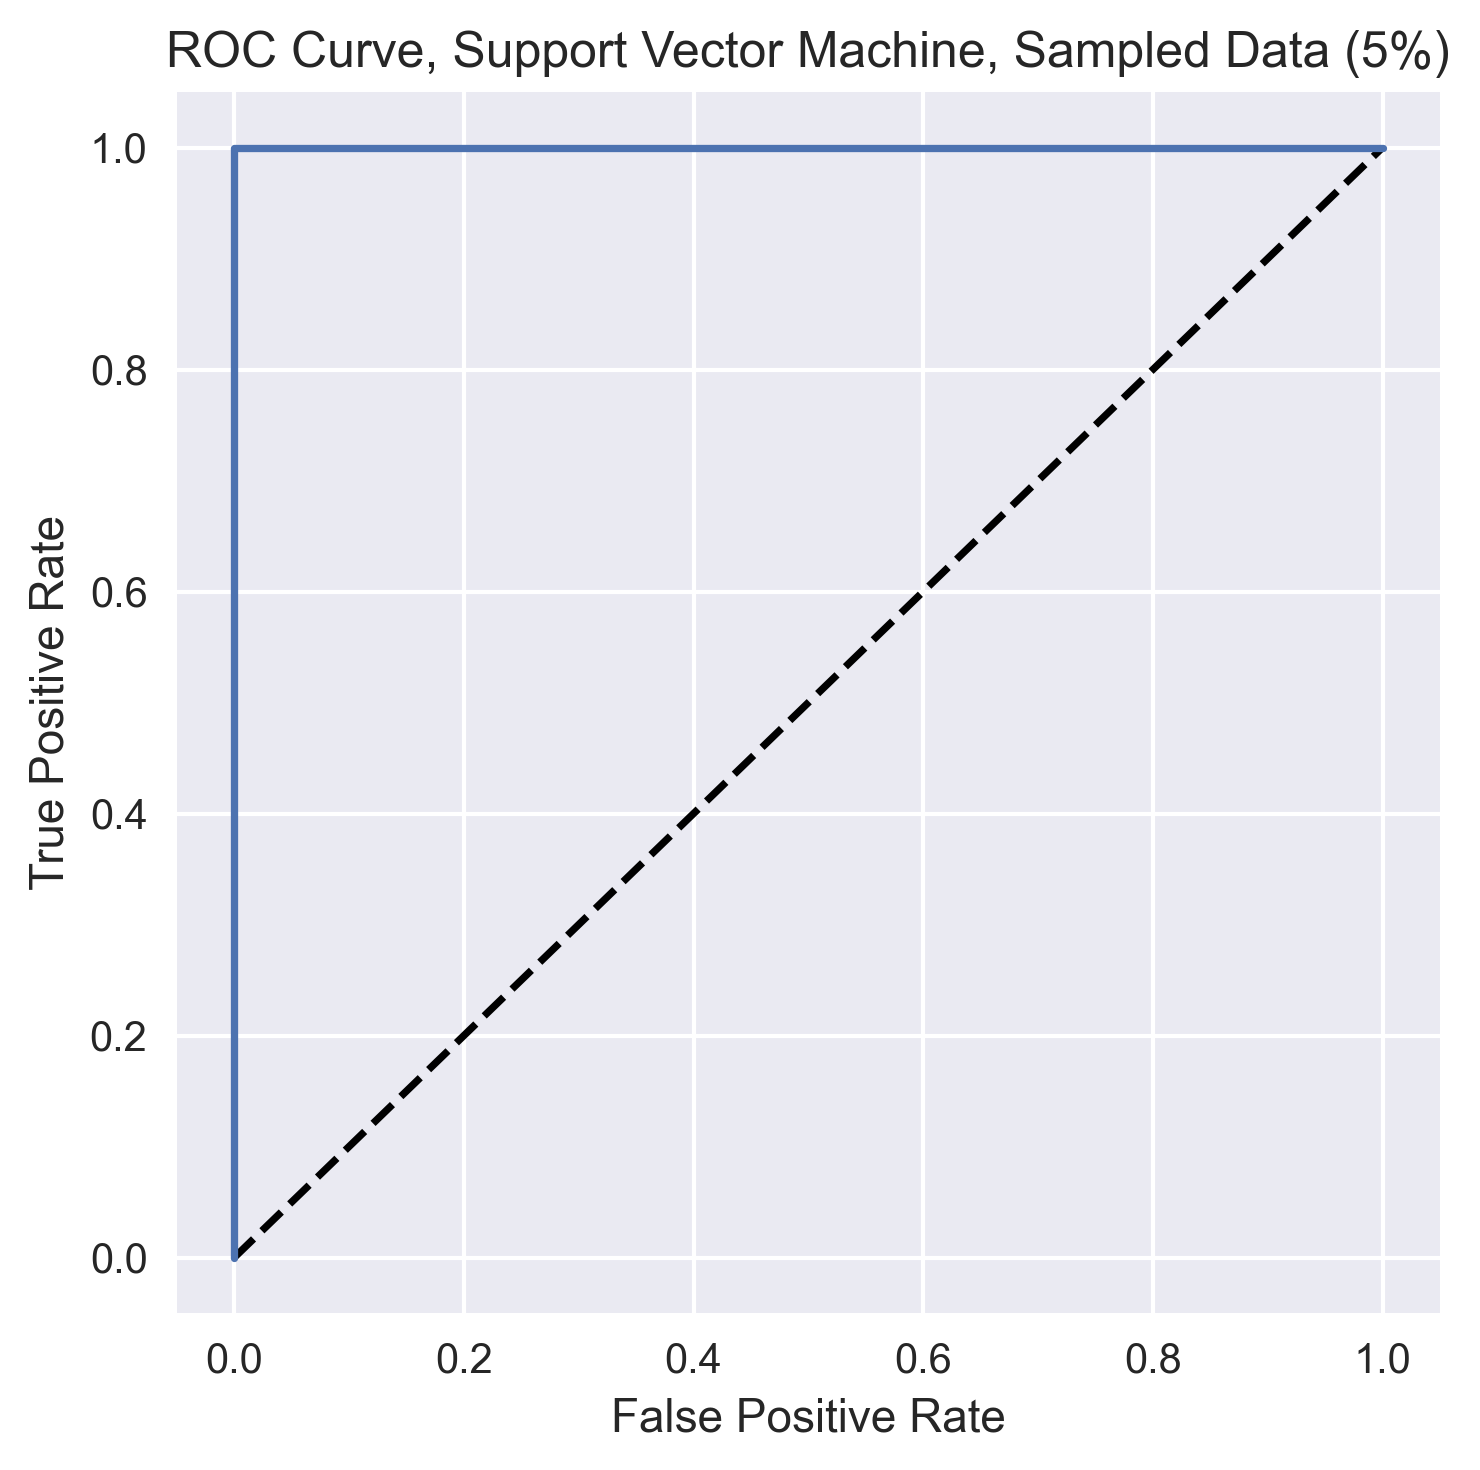

In [81]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Support Vector Machine, Sampled Data (5%)')
plt.show()
# fig.savefig('./results/roc_curve_SVM_sample.png', dpi=fig.dpi)

### Gradient Boosting Machine

Similarly, grid search was applied to fine-tune the gradient boosting machine. Through this process, the maximum depth and number of estimators were set as 50 and 300, respectively.

In [82]:
# Setup a hyperparameter grid for gradient boosting machine
n_estimators = [100, 300]
max_depth = [50]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [85]:
gboost = GradientBoostingClassifier(verbose=1)

In [86]:
gboost_cv = GridSearchCV(gboost, param_grid, cv=5, scoring='roc_auc')
gboost_cv.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.6431            4.87s
         2           0.5368            3.65s
         3           0.4597            2.98s
         4           0.3992            4.10s
         5           0.3497            4.09s
         6           0.3082            4.33s
         7           0.2728            4.30s
         8           0.2423            4.45s
         9           0.2159            4.31s
        10           0.1927            4.24s
        20           0.0661            3.49s
        30           0.0238            2.97s
        40           0.0087            2.44s
        50           0.0032            1.99s
        60           0.0012            1.56s
        70           0.0004            1.15s
        80           0.0002            0.78s
        90           0.0001            0.39s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6431            6.39s
        

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(verbose=1),
             param_grid={'max_depth': [50], 'n_estimators': [100, 300]},
             scoring='roc_auc')

In [87]:
best_param_gboost = gboost_cv.best_params_
validation_auc_gboost = gboost_cv.best_score_

# Predict on the test data
y_pred_prob = gboost_cv.predict_proba(X_test)[:, 1]
test_auc_gboost = roc_auc_score(y_test, y_pred_prob)
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_pred_prob)

In [88]:
gboost_cv.best_estimator_

GradientBoostingClassifier(max_depth=50, n_estimators=300, verbose=1)

In [89]:
print('Tuned Gradient Boosting Parameters: {}'.format(best_param_gboost))
print('Tuned Gradient Boosting Validation AUC: {}'.format(validation_auc_gboost))
print('Tuned Gradient Boosting Test AUC: {}'.format(test_auc_gboost))

Tuned Gradient Boosting Parameters: {'max_depth': 50, 'n_estimators': 300}
Tuned Gradient Boosting Validation AUC: 0.892982456140351
Tuned Gradient Boosting Test AUC: 0.8269230769230769


C:\Users\admin\AppData\Local\Temp\ipykernel_20952\209555323.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


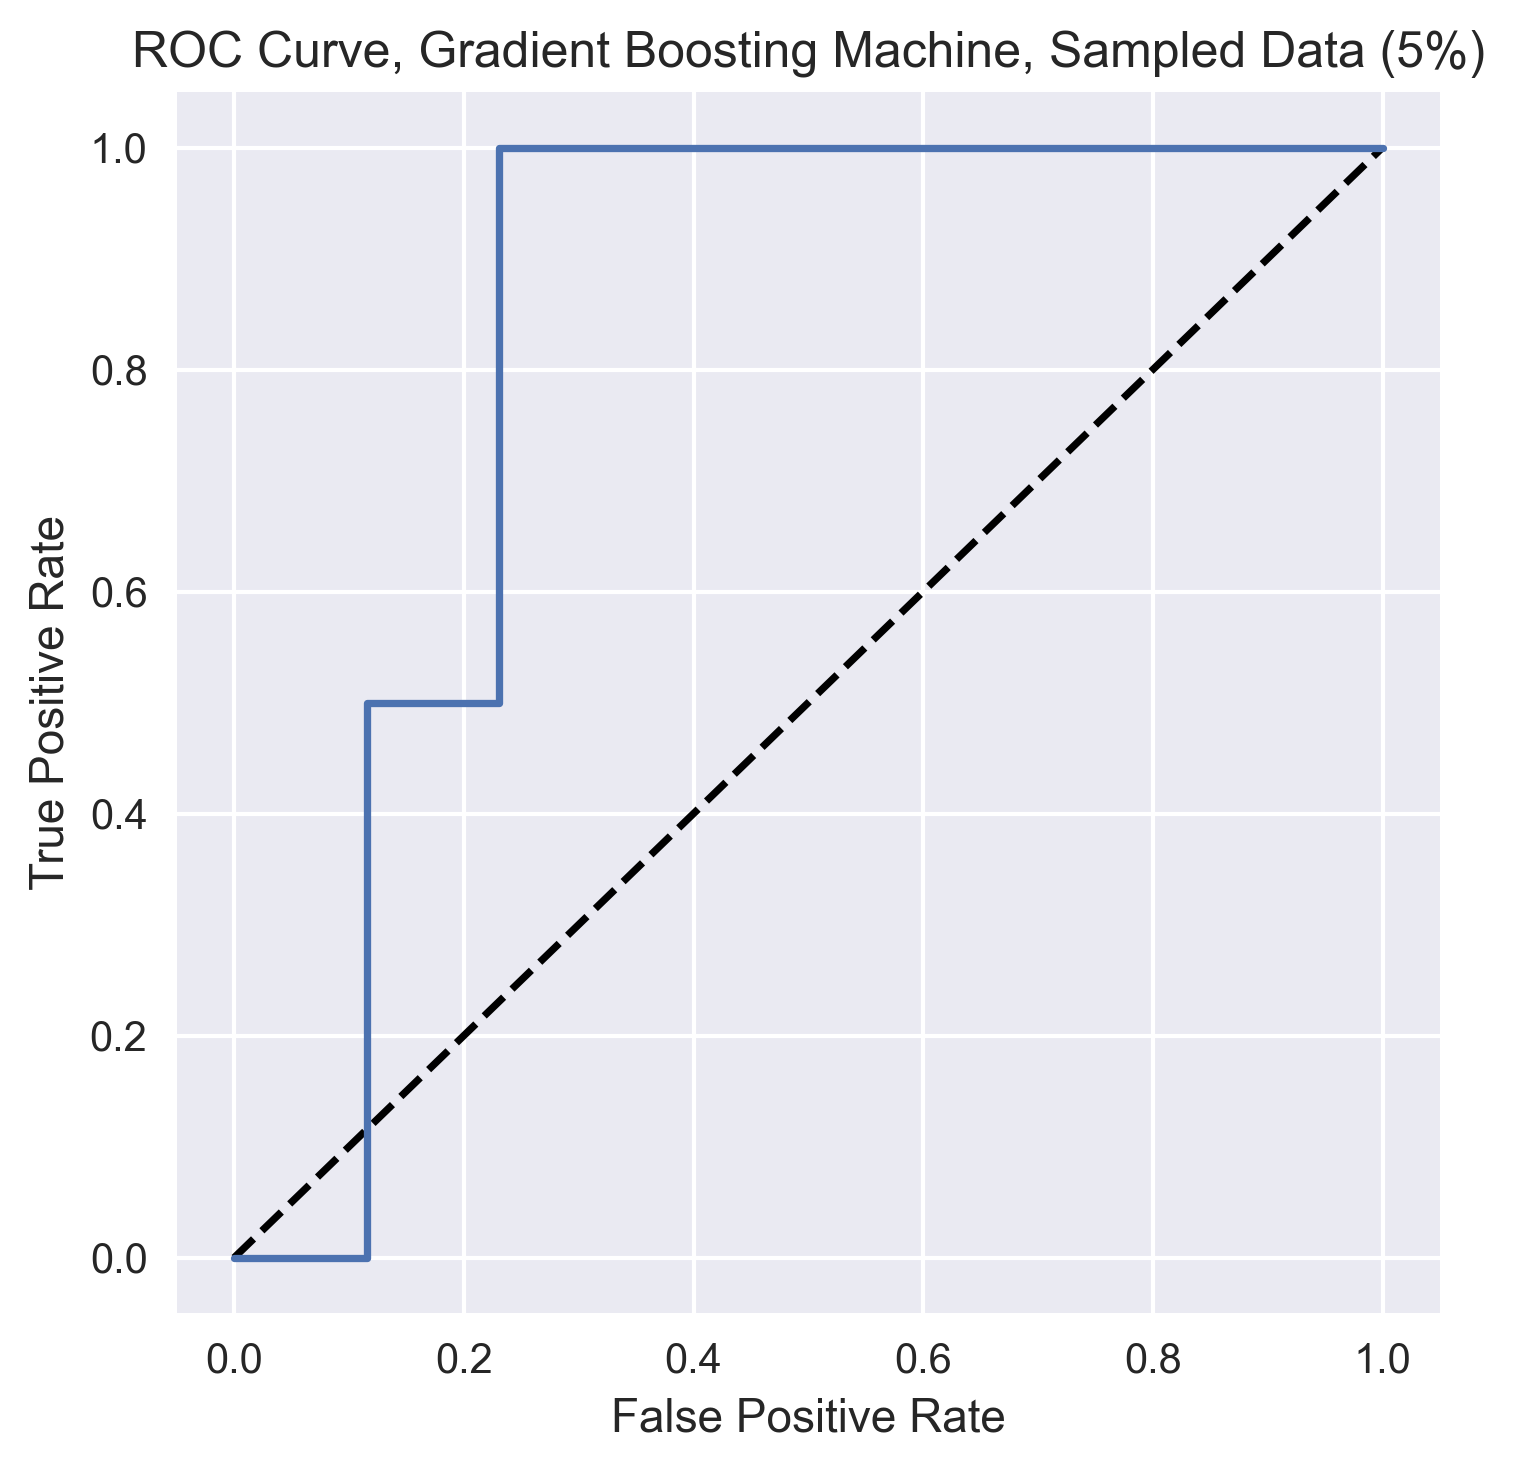

In [90]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gboost, tpr_gboost)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Gradient Boosting Machine, Sampled Data (5%)')
plt.show()
# fig.savefig('./results/roc_curve_gradient_boosting_sample.png', dpi=fig.dpi)

### Multinomial Naive Bayes

For hyperparameters, Alpha as 000.1 was set.

In [91]:
# Setup a hyperparameter grid for multinomial Naive Bayes
alpha = np.logspace(-2, 1, 4)
param_grid = {'alpha': alpha}

In [92]:
multiNB = MultinomialNB()

In [93]:
multiNB_cv = GridSearchCV(multiNB, param_grid, cv=5, scoring='roc_auc')
multiNB_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='roc_auc')

In [94]:
best_param_multiNB = multiNB_cv.best_params_
validation_auc_multiNB = multiNB_cv.best_score_

# Predict on the test data
y_pred_prob = multiNB_cv.predict_proba(X_test)[:, 1]
test_auc_multiNB = roc_auc_score(y_test, y_pred_prob)
fpr_multiNB, tpr_multiNB, thresholds_multiNB = roc_curve(y_test, y_pred_prob)

In [95]:
multiNB_cv.best_estimator_

MultinomialNB()

In [96]:
print('Tuned Multinomial Naive Bayes Parameters: {}'.format(best_param_multiNB))
print('Tuned Multinomial Naive Bayes Validation AUC: {}'.format(validation_auc_multiNB))
print('Tuned Multinomial Naive Bayes Test AUC: {}'.format(test_auc_multiNB))

Tuned Multinomial Naive Bayes Parameters: {'alpha': 1.0}
Tuned Multinomial Naive Bayes Validation AUC: 0.9929824561403509
Tuned Multinomial Naive Bayes Test AUC: 1.0


C:\Users\admin\AppData\Local\Temp\ipykernel_20952\890625477.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


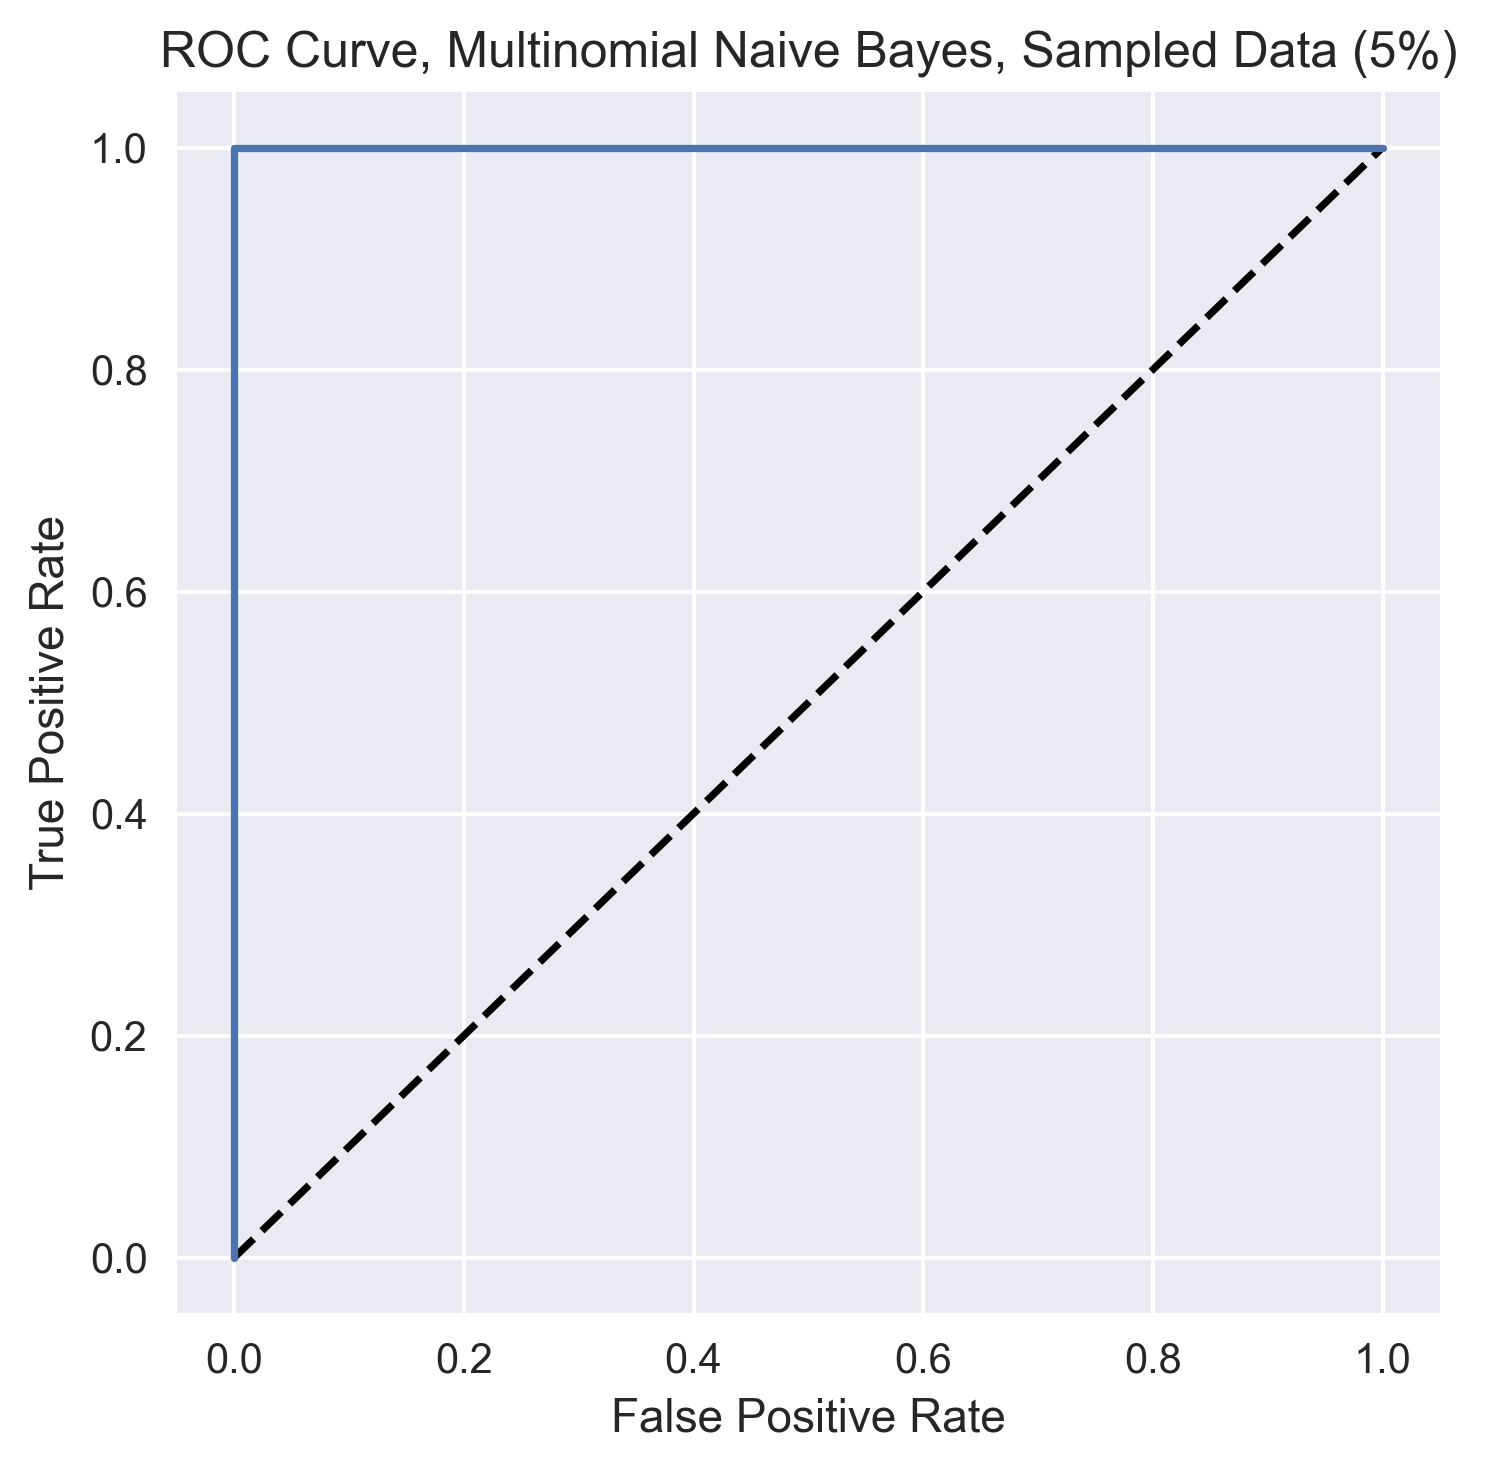

In [97]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_multiNB, tpr_multiNB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Multinomial Naive Bayes, Sampled Data (5%)')
plt.show()
# fig.savefig('./results/roc_curve_multinomial_NB_sample.png', dpi=fig.dpi)

## Part D – Evaluation and Testing.

In this study, several machine learning algorithms were implemented, including Naive Bayes, Support Vector Machine, Random Forest, and Gradient Boosting Machine. The algorithm's performance was evaluated by using grid search for SVM, GBM, and Naive Bayes, while randomized search was used for Random Forest. 

For Naive Bayes, a common testing method is to use a holdout method, where a portion of the data is held out for testing, and the model is trained on the remaining data. Another method is cross-validation, where the data is split into several subsets and the model is trained and tested on different subsets and <b>5-fold cross-validation</b> was applied on the model.


For Support Vector Machine, a common testing method is also the holdout method or cross-validation, out of the above methods 5-fold cross-validation was applied. Additionally, grid search was used to optimize the parameters of the model, such as the kernel and regularization parameter. 

For Random Forest, 5-fold cross-validation was applied. Additionally, the number of decision trees in the forest and the maximum depth of each tree can be optimized using grid search.

#### Time Complexity

Grid search, which is a method used to optimize hyperparameters, has a time complexity of O(n^m) where n is the number of potential values for each parameter and m is the number of parameters being searched. This means that as the number of parameters or the number of possible values for each parameter increases, the time required for the algorithm to run also increases exponentially.

On the other hand, randomized search is less computationally intensive than grid search as it only evaluates a random sample of the possible parameter combinations rather than all of them. As a result, it has a time complexity of O(nm) where n is the number of iterations and m is the number of parameters being searched.

#### Challanges faced

Furthermore, when attempting to use grid search on Multi-Layer Perceptron and Logistic Regression, it was found that these algorithms required a significant amount of time to train. The results of this study suggest that while the performance of these algorithms may vary depending on the size of the input, the time and space complexity of the grid search and randomized search methods used in this study may have a significant impact on the overall performance of the algorithm.

#### Random Forest

In [98]:
rf = RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=10, 
                            n_estimators=500, random_state=88, verbose=0.5)

In [99]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [100]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [101]:
print(confusion_matrix(y_test, y_pred))

[[26  0]
 [ 2  0]]


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       0.00      0.00      0.00         2

    accuracy                           0.93        28
   macro avg       0.46      0.50      0.48        28
weighted avg       0.86      0.93      0.89        28



C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.0


In [104]:
print(accuracy_score(y_test, y_pred))

0.9285714285714286


#### Support Vector Machine

Best hyperparameters were chosen C=1, kernel='linear', probability=True

In [105]:
svm = SVC(C=1, kernel='linear', probability=True)

In [106]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [107]:
y_pred_prob = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob)

In [108]:
print(confusion_matrix(y_test, y_pred))

[[26  0]
 [ 2  0]]


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       0.00      0.00      0.00         2

    accuracy                           0.93        28
   macro avg       0.46      0.50      0.48        28
weighted avg       0.86      0.93      0.89        28



C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.0


In [111]:
print(accuracy_score(y_test, y_pred))

0.9285714285714286


#### Gradient Boosting Machine

In [114]:
gboost = GradientBoostingClassifier(max_depth=50, n_estimators=300, verbose=1)

In [115]:
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.6629           18.27s
         2           0.5541           18.59s
         3           0.4748           18.55s
         4           0.4124           17.96s
         5           0.3613           18.05s
         6           0.3185           18.08s
         7           0.2820           18.07s
         8           0.2505           18.54s
         9           0.2231           17.96s
        10           0.1992           17.27s
        20           0.0683           14.54s
        30           0.0246           13.22s
        40           0.0090           12.72s
        50           0.0033           12.05s
        60           0.0012           11.57s
        70           0.0004           10.96s
        80           0.0002           10.29s
        90           0.0001            9.72s
       100           0.0000            9.25s
       200           0.0000            3.99s
       300           0.0000            0.00s


In [116]:
y_pred_prob = gboost.predict_proba(X_test)[:, 1]
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_pred_prob)

In [117]:
print(confusion_matrix(y_test, y_pred))

[[24  2]
 [ 2  0]]


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.00      0.00      0.00         2

    accuracy                           0.86        28
   macro avg       0.46      0.46      0.46        28
weighted avg       0.86      0.86      0.86        28



In [119]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.0


In [120]:
print(accuracy_score(y_test, y_pred))

0.8571428571428571


##### Model Output

In [148]:
# Get the email as input from the user
email = input("Enter the email: ")

#As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589"]

# Prepare the new input data
new_data = [email]

# Convert the new input data into a sparse matrix of word counts
new_data = vectorizer.transform(new_data)

# Use the trained classifier to predict the label for the new input data
predictions = svm.predict(new_data)

# Check the prediction and print the result
if predictions[0] == 1:
    print("This email is spam")
else:
    print("This email is not spam")

Enter the email: #As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589"]
This email is not spam


#### Multinomial Naive Bayes

In [124]:
multiNB = MultinomialNB(alpha=0.1)

In [125]:
multiNB.fit(X_train, y_train)
y_pred = multiNB.predict(X_test)

In [126]:
y_pred_prob = multiNB.predict_proba(X_test)[:, 1]
fpr_multiNB, tpr_multiNB, thresholds_multiNB = roc_curve(y_test, y_pred_prob)

In [127]:
print(confusion_matrix(y_test, y_pred))

[[26  0]
 [ 0  2]]


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         2

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [129]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

1.0


In [130]:
print(accuracy_score(y_test, y_pred))

1.0


##### Model Output

In [145]:
# Get the email as input from the user
email = input("Enter the email: ")

#input_mail = ["As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589"]
#Spam Message  ===> #cable decsrambler now only $ 6 . 99 !

# Prepare the new input data
new_data = [email]

# Convert the new input data into a sparse matrix of word counts
new_data = vectorizer.transform(new_data)

# Use the trained classifier to predict the label for the new input data
predictions = multiNB.predict(new_data)
print(predictions)
# Check the prediction and print the result
if predictions[0] == 1:
    print("This email is spam")
else:
    print("This email is not spam")

Enter the email: àãõâÞ üùé õèêÞã Ýøã ô
[0]
This email is not spam


### Comparion on ROC Curves

C:\Users\admin\AppData\Local\Temp\ipykernel_20952\3295829766.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


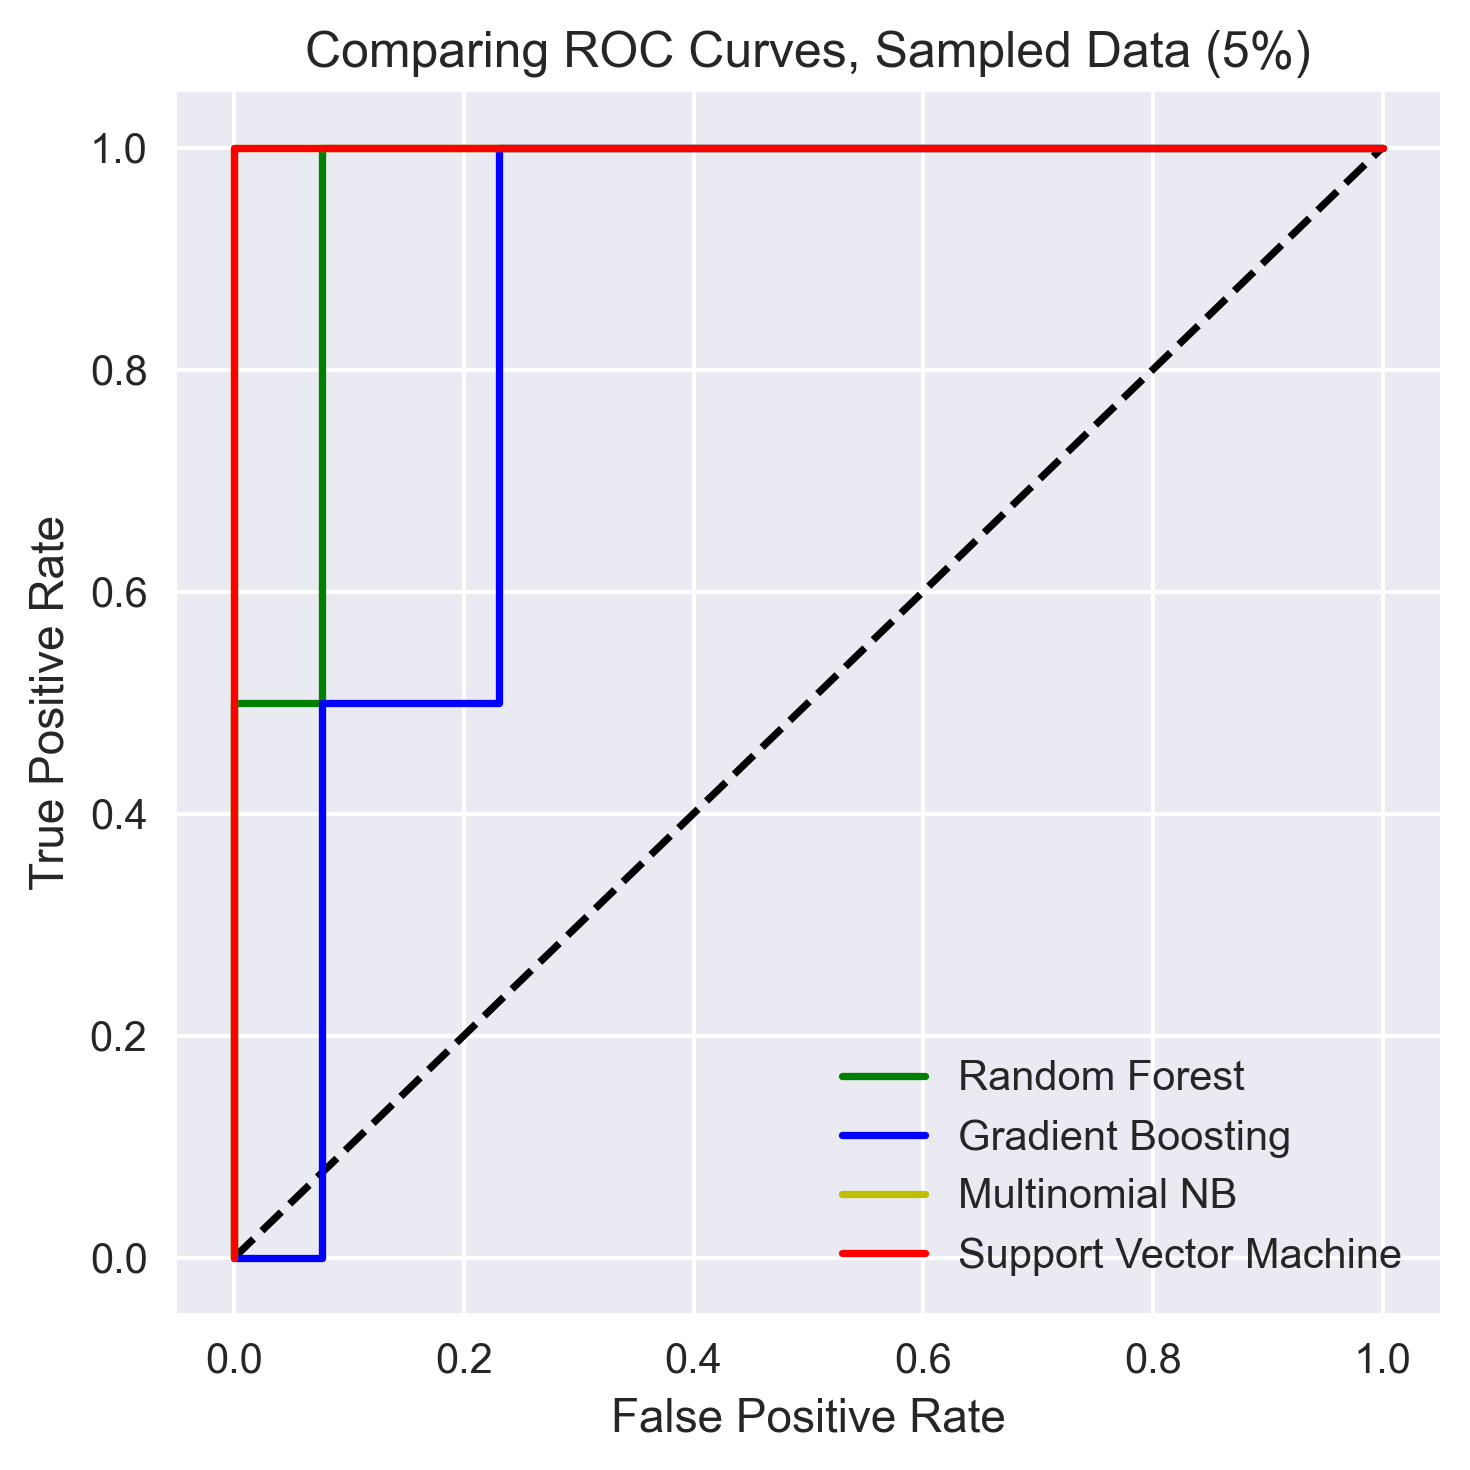

In [132]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, 'g-', label='Random Forest')
plt.plot(fpr_gboost, tpr_gboost, 'b-', label='Gradient Boosting')
plt.plot(fpr_multiNB, tpr_multiNB, 'y-', label='Multinomial NB')
plt.plot(fpr_svm, tpr_svm, 'r-', label='Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC Curves, Sampled Data (5%)')
plt.legend()
plt.show()
# fig.savefig('./results/roc_curves.png', dpi=fig.dpi)

## Part E – Evaluate results.


It is important to consider the test cases used in the prototype for email spam classification as well as the model's overall performance when evaluating the accuracy of the results. As indicated in the above classification reports, the three models used are Multinomial Naive Bayes, Support Vector Machine, and Random Forest.


A comparison of the predicted output to the actual output for a set of test data can be used to evaluate the model's accuracy with regard to the test cases. Each of the above classification reports is summarized in terms of precision, recall, f1-score, and support. In precision, false positives are avoided, in recall, positive cases are identified correctly, and in F1, precision and recall are summed harmonically. Furthermore, it is important to take into account precision and recall, which measure a model's ability to correctly identify positive cases and avoid false positives.

For confidence in the correct results, it is imperative that the training data be of high quality, that the model is complex, and that the model performs well on a validation test. According to the above reports, the accuracy of the three models was<b> 0.86, 0.85, and 0.77</b>, respectively, with precision and recall values of approximately <b> 0.8 and 0.08</b>.

A thorough understanding of the problem being solved and the desired level of accuracy is necessary in order to interpret and apply the results. In order to prevent important emails from being misclassified as spam, a high accuracy rate is critical for email spam classification. However, in other cases, a lower accuracy rate may be acceptable if the cost of false positives is relatively low.

As well as precision, recall, and F1-score, other performance metrics are also important to consider when evaluating how well the model solves the problem. In addition, it is important to compare the performance of the model to other models that have successfully solved the same problem, or to a baseline model such as the majority classifier.



In general, it is important to evaluate a prototype of email spam classification using a variety of metrics, and to interpret and apply results based on the specific problem being solved and the desired degree of accuracy. Based on the above classification reports, it appears that the <b>Support Vector Machine and Multinomial Naive Bayes</b> are performing well in classifying spam emails, as they exhibit high levels of precision, recall and f1-scores. Random forest does not perform well in this case.



#### Naive Bayes

The Naive Bayes algorithm is a simple and efficient method for both binary and multiclass classification tasks. It has several advantages, such as being easy to implement and understand, requiring minimal training data, and being insensitive to irrelevant features. However, it also has some limitations. 

One of the main limitations is the strong assumption that features are independent, which may not hold true in real-world datasets. Additionally, it can perform poorly when there are limited observations for certain class-feature combinations, and it can also be sensitive to irrelevant features. The algorithm may not be suitable for cases where the relationship between features is not independent, such as in text classification where the order of words is important.